<h2 style="text-align: center">Proyecto 1</h2>

### Integrantes:
- Sofia Marcano 
- Carmen Samaniego
- Daniela Donado


***

#### **Punto 1** Análisis exploratorio de las variables de interés


#### Cargamos los datos para obtener las variables de interés

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis

data = pd.read_csv("heart_attack_prediction_dataset.csv")

#### Evaluamos la presencia de datos atípicos en las variables cuantitativas solicitadas

- No se pueden considerar las variables Sex, Smoking o Heart Attack Risk debido a que son cualitativas

#### Graficación de diagrama de cajas y bigotes 


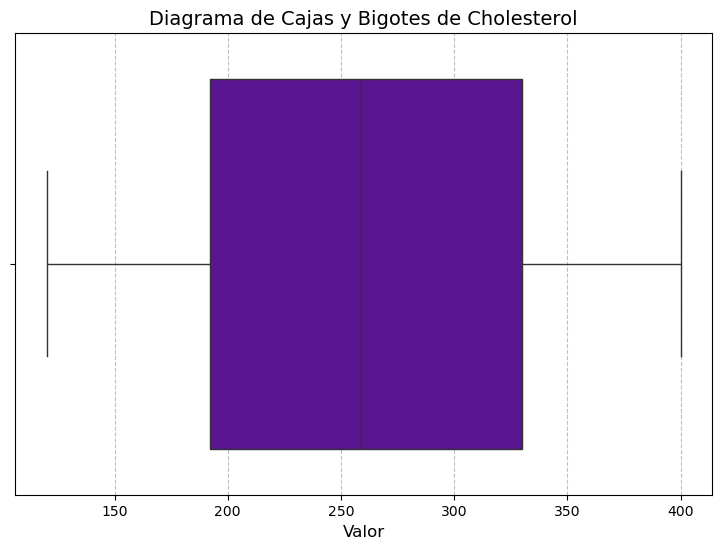

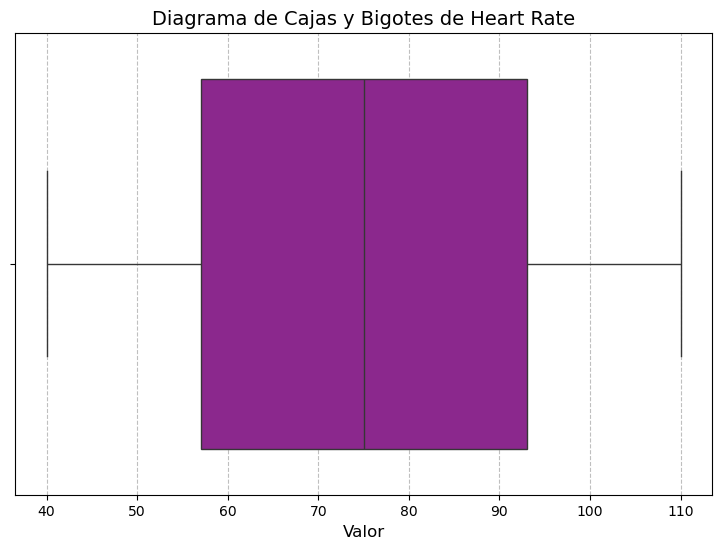

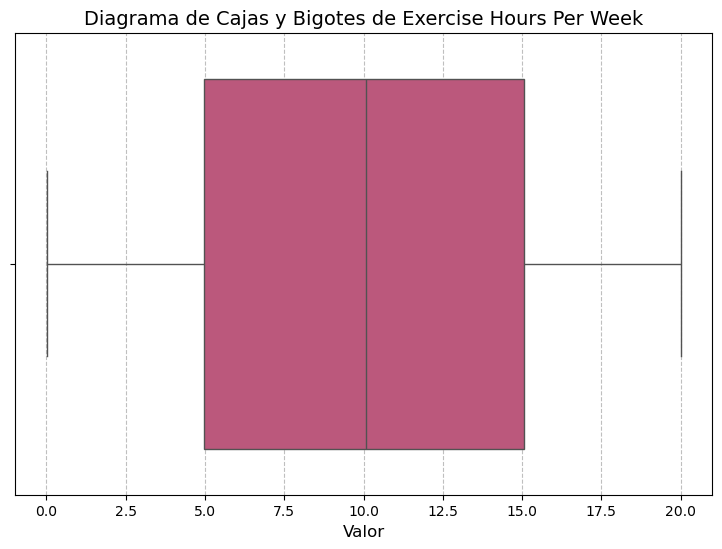

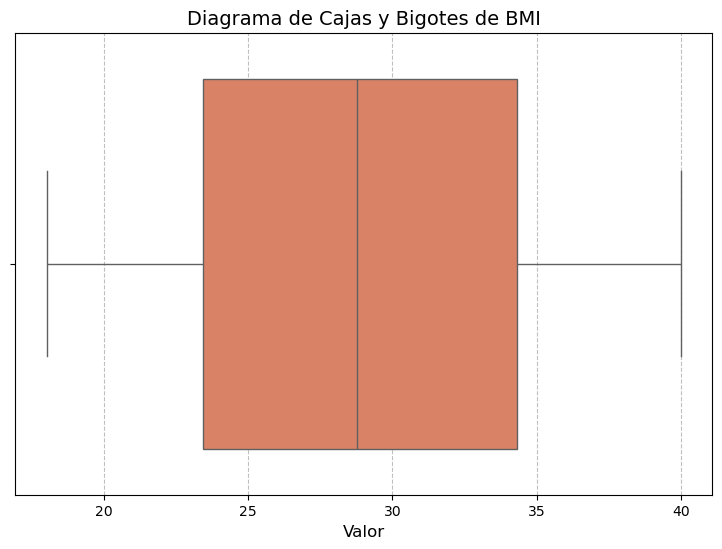

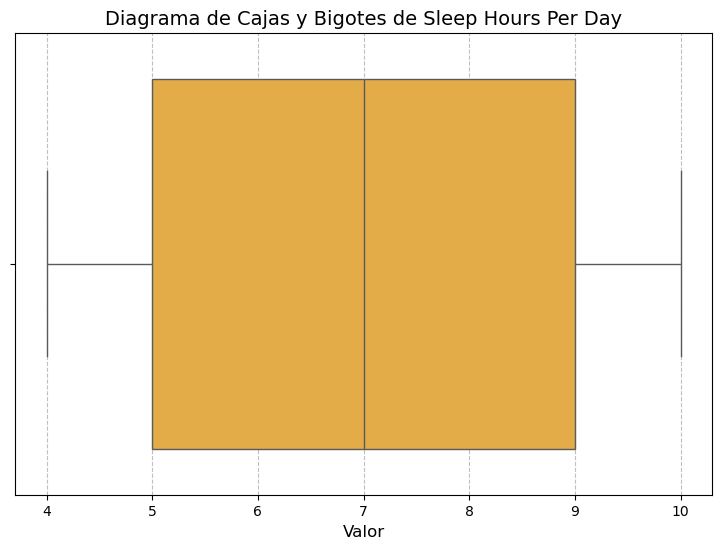

In [3]:
columnas = ['Cholesterol', 'Heart Rate', 'Exercise Hours Per Week', 'BMI', 'Sleep Hours Per Day']   
colores = sns.color_palette("plasma", len(columnas))

def graficar_boxplot(columna, color):
    plt.figure(figsize=(9, 6))
    sns.boxplot(x=columna, orient="h", color=color)

    plt.title(f"Diagrama de Cajas y Bigotes de {columna.name}", fontsize=14 )
    plt.xlabel("Valor", fontsize=12)
    plt.yticks(rotation=45)
    plt.grid(axis='x', linestyle='--', alpha=0.8)
    plt.show()

for i, col in enumerate(columnas):
    graficar_boxplot(data[col], colores[i])

No se evidencian datos atípicos en ninguno de los diagramas de cajas y bigotes. Cada variable presenta una distribución relativamente **homogénea y uniforme**, lo cual se refleja en la posición central de la mediana dentro de cada caja.

Esto sugiere que los resultados obtenidos por la población evaluada son consistentes entre sí. Sin embargo, sobre el grado de dispersión se requieren otros análisis, dado que el nivel de variabilidad depende del ancho de la caja y esto puede no ser muy preciso.

Para **confirmar la ausencia de valores atípicos**, realizamos los cálculos numéricos

In [4]:
def datos_atipicos(columna):
    Q1 = columna.quantile(0.25)
    Q3 = columna.quantile(0.75)
    IQR = Q3 - Q1

    lower_lim = Q1 - 1.5 * IQR
    upper_lim = Q3 + 1.5 * IQR

    outliers = columna[(columna < lower_lim) | (columna > upper_lim)]
    if outliers.empty:
        print(f"No hay valores atípicos en {columna.name}")
    else:
        print(f"Valores atípicos en {columna.name}:", outliers)
    
    return outliers
    

outliers_cholesterol = datos_atipicos(data['Cholesterol'])

outliers_heart_rate = datos_atipicos(data['Heart Rate'])

outliers_exercise_hours = datos_atipicos(data['Exercise Hours Per Week'])

outliers_bmi = datos_atipicos(data['BMI'])

outliers_sleep_hours = datos_atipicos(data['Sleep Hours Per Day'])


No hay valores atípicos en Cholesterol
No hay valores atípicos en Heart Rate
No hay valores atípicos en Exercise Hours Per Week
No hay valores atípicos en BMI
No hay valores atípicos en Sleep Hours Per Day


De esta manera, confirmamos la ausencia de datos atípicos en las variables Colesterol, Heart Rate, Exercise Hours Per Week. BMI y Sleep Hours Per Day

#### Prueba de presencia de datos ausentes

In [5]:
print(data.isnull().sum())

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64


No se presentaron datos ausentes en el dataset, por tanto, no es necesario eliminar o reemplazar estos valores por la media o mediana

#### Cálculo de media y mediana de variables cuantitativas

In [6]:
def medidas_tendencia_central(columna):
    media = columna.mean()
    mediana = columna.median()

    return media, mediana

print("Los valores de media y mediana de las variables evaluadas son:\n")
for i in columnas:
    media, mediana = medidas_tendencia_central(data[i])
    print(f"{i} \n Media: {media:.2f} y Mediana: {mediana:.2f} \n")
    
tendencia = {}
for i in columnas:
    media, mediana = medidas_tendencia_central(data[i])
    tendencia[i] = {"media": media, "mediana": mediana}

Los valores de media y mediana de las variables evaluadas son:

Cholesterol 
 Media: 259.88 y Mediana: 259.00 

Heart Rate 
 Media: 75.02 y Mediana: 75.00 

Exercise Hours Per Week 
 Media: 10.01 y Mediana: 10.07 

BMI 
 Media: 28.89 y Mediana: 28.77 

Sleep Hours Per Day 
 Media: 7.02 y Mediana: 7.00 



Las variables evaluadas presentan valores **muy cercanos** entre la media y la mediana, lo cual coincide con lo observado en los diagramas de cajas y bigotes. Esto afianza la idea de que la población analizada muestra valores similares en los niveles de colesterol, horas de sueño por día, horas de ejercicio por semana, índice de masa corporal (IMC) y frecuencia cardíaca. Por tanto, ambas representan adecuadamente el **comportamiendo general** de los datos y pueden usarse en análisis posteriores sin riesgo de sesgos importantes.

#### Uso de histogramas para analizar la distribución de las variables

El uso de histogramas nos permite observar la distribución de los datos de forma distinta, así que hacemos uso de ello en nuestro análisis exploratorio.

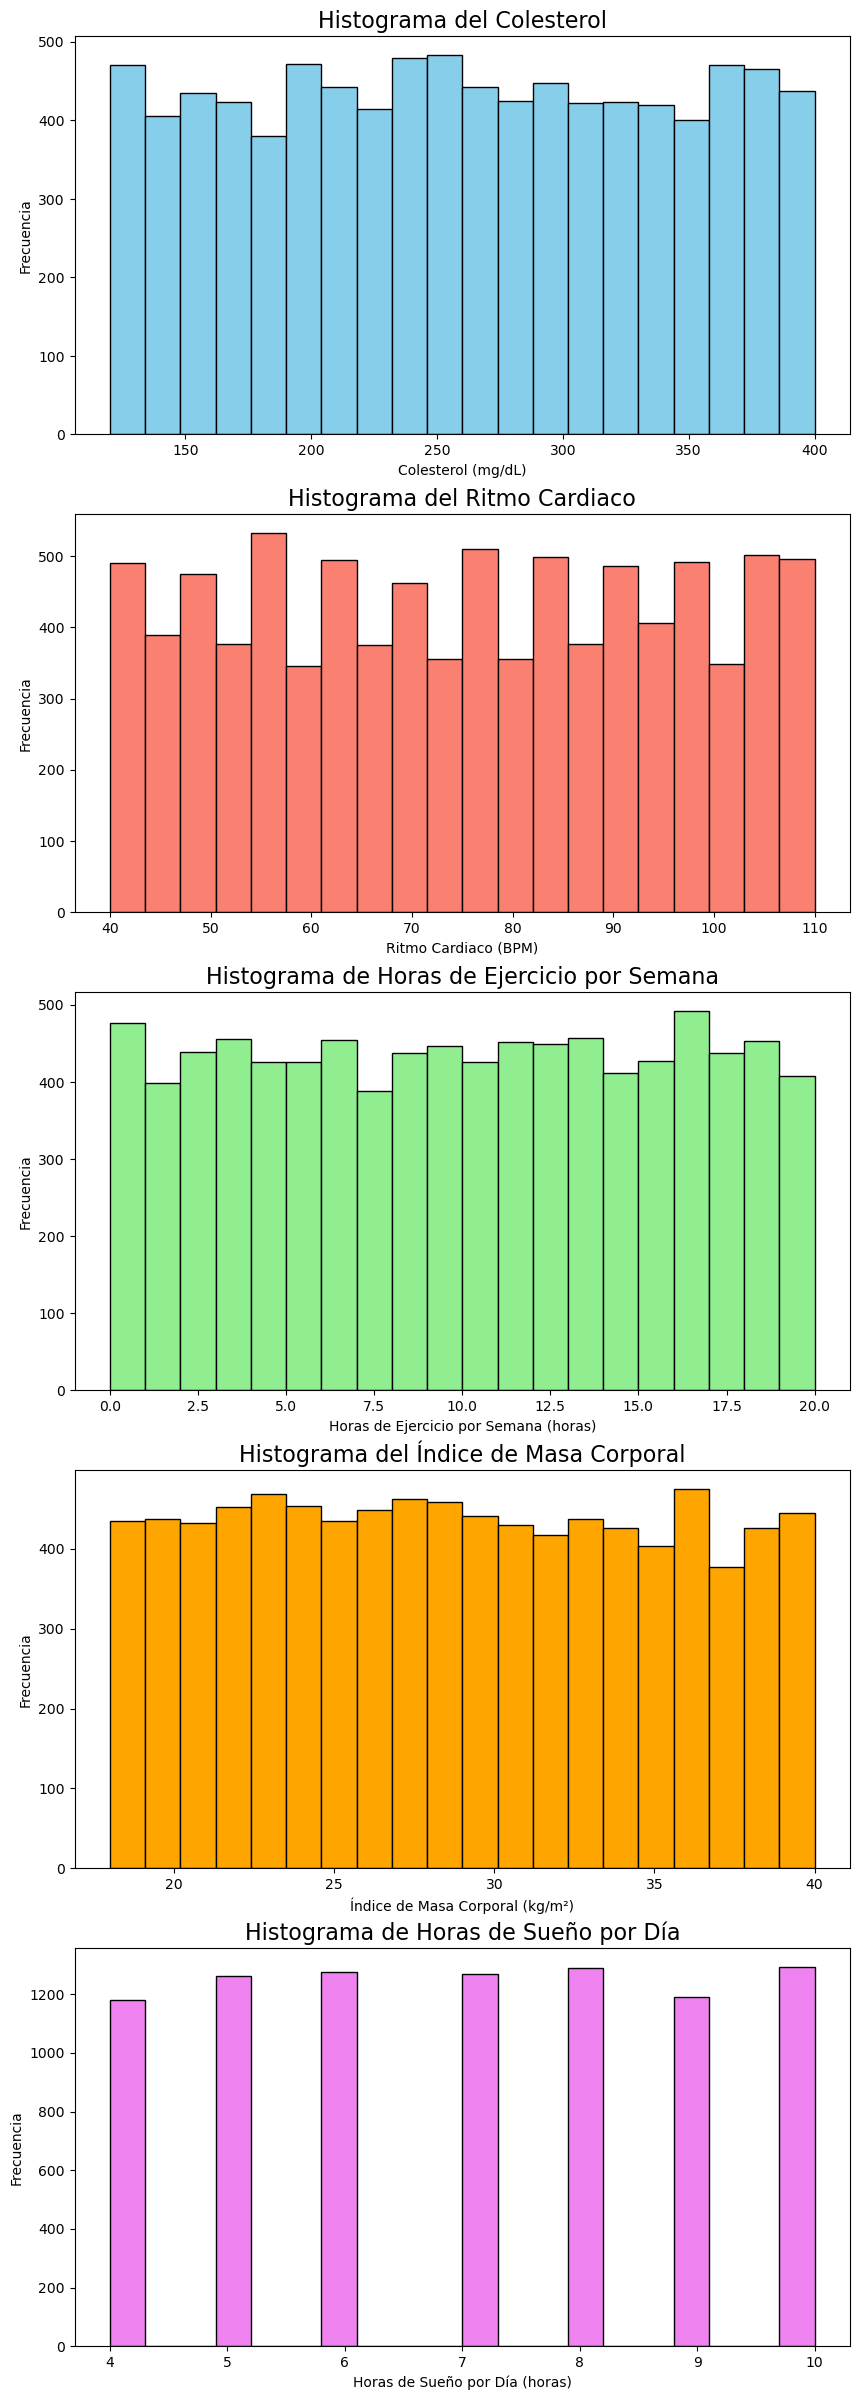

In [7]:
colores = ["skyblue", "salmon", "lightgreen", "orange", "violet"]

variables = ['Cholesterol', 'Heart Rate', 'Exercise Hours Per Week', 'BMI', 'Sleep Hours Per Day']
titulos = ["Histograma del Colesterol", "Histograma del Ritmo Cardiaco", "Histograma de Horas de Ejercicio por Semana", "Histograma del Índice de Masa Corporal", "Histograma de Horas de Sueño por Día"]
eje_x= ["Colesterol (mg/dL)", "Ritmo Cardiaco (BPM)", "Horas de Ejercicio por Semana (horas)", "Índice de Masa Corporal (kg/m²)", "Horas de Sueño por Día (horas)"]

fig, ax = plt.subplots(5, 1, figsize=(10, 30))

for i, var in enumerate(variables):
    ax[i].hist(data[var], bins=20, color=colores[i], edgecolor="black")
    ax[i].set_title(titulos[i], fontsize=16)
    ax[i].set_xlabel(eje_x[i])
    ax[i].set_ylabel("Frecuencia")


Se observa una distribución homogénea y uniforme en cada variable evaluada, lo cual es consistente con los valores cercanos entre la media y mediana , con lo observado en los diagramas de cajas y bigotes y la ausencia de valores atípicos.

#### Análisis de variabilidad

In [8]:

columnas = ['Cholesterol', 'Heart Rate', 'Exercise Hours Per Week', 'BMI', 'Sleep Hours Per Day']

def medidas_variacion(columna, media, mediana):
    desviaciones = abs(columna - mediana)
    MAD = np.median(desviaciones)
    std = np.std(columna)
    CV = (std/media)*100
    curtosis = kurtosis(columna, fisher=True)
    return MAD, std, CV, curtosis
resultados = []

for i in columnas:
    media = tendencia[i]["media"]
    mediana = tendencia[i]["mediana"]
    MAD, std, CV, curtosis = medidas_variacion(data[i], media, mediana)
    resultados.append({
        "Variable": i,
        "Media": round(media, 4),
        "Mediana": round(mediana,4),
        "MAD": round(MAD, 4),
        "Desviación Estándar": round(std, 4),
        "Coeficiente de Variación (%)": round(CV, 4),
        "Curtosis": round(curtosis, 4)
    })
    
tabla = pd.DataFrame(resultados)
    
e = (
    tabla.style
    .set_table_styles([
        {'selector': 'th.col0', 'props': [('background-color', 'skyblue'), ('color', 'black')]},
        {'selector': 'th.col1', 'props': [('background-color', 'salmon'), ('color', 'black')]},
        {'selector': 'th.col2', 'props': [('background-color', 'skyblue'), ('color', 'black')]},
        {'selector': 'th.col3', 'props': [('background-color', 'salmon'), ('color', 'black')]},
        {'selector': 'th.col2', 'props': [('background-color', 'skyblue'), ('color', 'black')]},
        {'selector': 'th.col5', 'props': [('background-color', 'salmon'), ('color', 'black')]},
        {'selector': 'th.col6', 'props': [('background-color', 'skyblue'), ('color', 'black')]},
        {'selector': 'th', 'props': [('text-align', 'center'), ('font-weight', 'bold'), ('border', '1px solid #ccc')]},
        {'selector': 'td', 'props': [('text-align', 'center'), ('border', '1px solid #ccc'), ('font-size', '13px')]}
    ])
    .format("{:.4f}", subset=["Media", "Mediana", "MAD", "Desviación Estándar", "Coeficiente de Variación (%)", "Curtosis"])
    .hide(axis="index")
)

e


Variable,Media,Mediana,MAD,Desviación Estándar,Coeficiente de Variación (%),Curtosis
Cholesterol,259.8772,259.0000,69.0000,80.8587,31.1142,-1.1803
Heart Rate,75.0217,75.0000,18.0000,20.5498,27.3918,-1.2112
Exercise Hours Per Week,10.0143,10.0696,5.0283,5.7834,57.7517,-1.2033
BMI,28.8914,28.7690,5.4452,6.3188,21.8709,-1.1880
Sleep Hours Per Day,7.0235,7.0000,2.0000,1.9884,28.3101,-1.2323


### Descripción sobre el tipo de distribución que presentan las variables y nivel de variabilidad

- Son uniformes

#### La variable Cholesterol 
Presenta una distribución aproximadamente simétrica, con media cercana a la mediana, aunque con cierta dispersión (CV alto). No se observa una cola muy marcada. Su nivel de kurtosis negativa indica una distribución más plana y con menor concentración de valores en el centro.

#### La variable Heart Rate
Presenta una distribución relativamente simétrica, con media y mediana cercanas. La dispersión es moderada (CV medio), lo que indica cierta variabilidad entre los pacientes. No se evidencian colas pesadas.

#### La variable Exercise Hours Per Week
Evidencia una distribución asimétrica hacia la derecha (cola positiva), ya que la mediana es menor que la media. Esto indica que la mayoría de personas realiza pocas horas de ejercicio, pero existen algunos valores altos que elevan el promedio. La dispersión es alta. Su nivel de curtosis menor que 0 es consistente con la ausencia de datos atípicos.

#### La variable BMI
Presenta una distribución uniforme, aunque con media y mediana relativamente próximas. La dispersión es moderada, reflejando variabilidad en la composición, pero sin colas extremas muy notorias. Su curtosis negativa determina una distribución platicúrtica ante la ausencia de datos extremos.

#### Sleep Hours Per Day
Presenta una distribución bastante simétrica, con valores concentrados en torno a la media y baja dispersión (CV bajo). Por tanto, se observa un patrón más homogéneo en las horas de sueño, sin presencia de colas extremas, lo cual implica que la mayoría de los pacientes mantienen un patrón de sueño regular, con pocas diferencias entre sí.


***

#### **Punto 2** Determinar para las variables numéricas, si existe diferencia estadística entre, hombres y mujeres, entre fumadores y no fumadores, y entre personas con riesgo de infarto y sin riesgo

Importación de funciones útiles

In [9]:
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest # Prueba de z de proporcines 
from scipy.stats import binomtest
from statsmodels.stats.multitest import multipletests #para corrección bonferroni
from scipy.stats import ttest_ind #prueba t para dos muestras independientes 
from itertools import combinations #combinaciones para prueba t de comparaciones multiples
from scipy.stats import ttest_rel #Prueba t para muestras pareadas o no independientes 
from scipy.stats import mannwhitneyu #Prueba U de Mann-Whitney 
from scipy.stats import kstest, norm, ttest_1samp, wilcoxon
from scipy.stats import boxcox
from sklearn.preprocessing import QuantileTransformer

Funciones que se utilizarán

In [10]:
# Pruebas de normalidad
def test_normalityKS(data, variable): # Pruaba de Normalidad Kolmogorov-Smirnof 
    """
    data: arreglo de datos a evaluar la normalidad
    variable: string con el nombre de la variable 
    """  
    print(f"\n Análisis de normalidad por Kolmogorov-Smirnov para '{variable}'")

    # Kolmogorov-Smirnov (KS) test
    ks_stat, ks_p = stats.kstest(data, 'norm', args=(np.mean(data), np.std(data)))
    print(f" Estadístico = {ks_stat:.4f}, p-valor = {ks_p:.4f}")

def test_normalitySW(data, variable): # Prueba de Normalizas Shapiro-Wilks 
    """
    data: arreglo de datos a evaluar la normalidad
    variable: string con el nombre de la variable 
    """
    print(f"\n Análisis de normalidad por Shapiro-Wilk para '{variable}'")
    # Shapiro-Wilk test
    shapiro_stat, shapiro_p = stats.shapiro(data)
    print(f"Estadístico = {shapiro_stat:.4f}, p-valor = {shapiro_p:.4f}")
    

def test_homogeneityB(var1, var2, name1, name2): # Prueba de Barttlet 
    """
    var1 y var2: variables a las que se corroborará homocedasticidad 
    name1 y name2: strings con el nnombre de las variables
    """
    print(f"\n Análisis de homocedasticidad entre '{name1}' y '{name2}'")
    # Prueba de Bartlett (requiere normalidad)
    bartlett_stat, bartlett_p = stats.bartlett(var1, var2)
    print(f"Bartlett test: Estadístico = {bartlett_stat:.4f}, p-valor = {bartlett_p:.4f}")

def t_test_two_sample(datos1,datos2):#prubea T para dos muestras
    """
    datos1: datos de la primera muestra 
    datos2: datos de la segunda muestra
    """
    
    t_stat, p_value = ttest_ind(datos1, datos2)
    print(f"Prueba t para dos muestras, valor p: {p_value:.4f}")
    return p_value

def box_cox(data):
    b, l = stats.boxcox(data)  
    print(f"Lambda Box–Cox = {l:.4f}\n")
    return b, l

def U_Mann_W(datos1, datos2):
    stat, p_value = mannwhitneyu(datos1, datos2, alternative='two-sided')
    print(f"Mann-Whitney U: estadístico = {stat}, p = {p_value:.4f}")
    return p_value
def quantile_transform(data):
    QT = QuantileTransformer(output_distribution="normal", random_state=0)
    transformed = QT.fit_transform(data.values.reshape(-1, 1)).flatten()
    print("Transformación QuantileTransformer aplicada )")
    return transformed
    

El **alfa** para todas las pruebas que se harán será de 0.05

<h3 style='text-align: center;'>Hombres vs Mujeres</h3>

#### Punto 2-a

Se comparan los grupos **hombres** y **mujeres** mediante pruebas estadísticas para variables de salud como **colesterol**, **horas de sueño**, **frecuencia cardíaca**, **horas de ejercicio en la semana** y **BMI**, con el fin de identificar posibles diferencias significativas.

### Colesterol
**Prueba paramétrica:**
Prueba t de 2 muestras

**Hipótesis**

H0 = No existe diferencia significativa entre los niveles de colesterol de hombres y mujeres

H1 = Existe diferencia significativa entre los niveles de colesterol de hombres y mujeres

**Corroborar supuestos**

Normalidad

In [11]:
h_col = data.loc[data["Sex"]=="Male",  "Cholesterol"]
m_col = data.loc[data["Sex"]=="Female",  "Cholesterol"]

print(h_col.shape[0])
print(m_col.shape[0])

6111
2652


Las muestras son mayores que 50 así que se hace **Kolmogorov-Smirnoff**

In [12]:
test_normalityKS(h_col, "Cholesterol")
test_normalityKS(m_col, "Cholesterol")


 Análisis de normalidad por Kolmogorov-Smirnov para 'Cholesterol'
 Estadístico = 0.0579, p-valor = 0.0000

 Análisis de normalidad por Kolmogorov-Smirnov para 'Cholesterol'
 Estadístico = 0.0628, p-valor = 0.0000


p < 0.05, se **rechaza normalidad**. Procedemos a hacer una transformación: Box-cox no es exitosa para variables con distribución uniforme, así que se usa una **transformación de cuantiles**

In [13]:
QT = QuantileTransformer(output_distribution='normal')
h_col_qt = QT.fit_transform(h_col.values.reshape(-1, 1)).ravel()
m_col_qt = QT.fit_transform(m_col.values.reshape(-1, 1)).ravel()

Volver a probar normalidad

In [14]:
test_normalityKS(h_col_qt, "Cholesterol")
test_normalityKS(m_col_qt, "Cholesterol")


 Análisis de normalidad por Kolmogorov-Smirnov para 'Cholesterol'
 Estadístico = 0.0169, p-valor = 0.0596

 Análisis de normalidad por Kolmogorov-Smirnov para 'Cholesterol'
 Estadístico = 0.0218, p-valor = 0.1572


p > 0.05 en ambos, los datos ya **son normales**

#### Independencia
Ser hombre o mujer son variables independientes una de la otra

#### Homocedasticidad
Los datos transformados ya son normales así que usamos Bartlett

In [15]:
test_homogeneityB(h_col_qt, m_col_qt, "Colesterol Hombres", "Colesterol Mujeres")


 Análisis de homocedasticidad entre 'Colesterol Hombres' y 'Colesterol Mujeres'
Bartlett test: Estadístico = 0.8721, p-valor = 0.3504


p > 0.05, los datos son **homocedásticos.**

#### **Aplicar prueba t para 2 muestras**

In [16]:
resCol = t_test_two_sample(h_col_qt, m_col_qt)

Prueba t para dos muestras, valor p: 0.8914


p > 0.05 , se afirma H0: **No existe diferencia significativa entre los niveles de colesterol de hombres y mujeres**

#### Heart Rate
**Prueba paramétrica:**
Prueba t de 2 muestras

**Hipótesis**

H0 = No existe diferencia significativa entre la frecuencia cardiaca de hombres y mujeres

H1 = Existe diferencia significativa entre la frecuencia cardiaca de hombres y mujeres

**Corroborar supuestos**

Normalidad

In [17]:
h_hr = data.loc[data["Sex"]=="Male",  "Heart Rate"]
m_hr = data.loc[data["Sex"]=="Female",  "Heart Rate"]

print(h_hr.shape[0])
print(m_hr.shape[0])

6111
2652


Las muestras son mayores que 50 así que se hace **Kolmogorov-Smirnoff**

In [18]:
test_normalityKS(h_hr, "Heart Rate")
test_normalityKS(m_hr, "Heart Rate")


 Análisis de normalidad por Kolmogorov-Smirnov para 'Heart Rate'
 Estadístico = 0.0671, p-valor = 0.0000

 Análisis de normalidad por Kolmogorov-Smirnov para 'Heart Rate'
 Estadístico = 0.0724, p-valor = 0.0000


p < a, se **rechaza normalidad.** Procedemos a hacer una transformación de cuantiles

In [19]:
QT = QuantileTransformer(output_distribution='normal')
h_hr_qt = QT.fit_transform(h_hr.values.reshape(-1, 1)).ravel()
m_hr_qt = QT.fit_transform(m_hr.values.reshape(-1, 1)).ravel()

Volver a probar normalidad

In [20]:
test_normalityKS(h_hr_qt, "Heart Rate")
test_normalityKS(m_hr_qt, "Heart Rate")


 Análisis de normalidad por Kolmogorov-Smirnov para 'Heart Rate'
 Estadístico = 0.0618, p-valor = 0.0000

 Análisis de normalidad por Kolmogorov-Smirnov para 'Heart Rate'
 Estadístico = 0.0610, p-valor = 0.0000


p < a en ambos, los datos todavía **no son normales.** Intentar Box-Cox

In [21]:
b1, l1 = box_cox(h_hr)
b2, l2 = box_cox(m_hr)

Lambda Box–Cox = 0.7236

Lambda Box–Cox = 0.8125



Volver a probar normalidad

In [22]:
test_normalityKS(b1, "Heart Rate")
test_normalityKS(b2, "Heart Rate")


 Análisis de normalidad por Kolmogorov-Smirnov para 'Heart Rate'
 Estadístico = 0.0676, p-valor = 0.0000

 Análisis de normalidad por Kolmogorov-Smirnov para 'Heart Rate'
 Estadístico = 0.0755, p-valor = 0.0000


No se pudo volver normales los datos, hacer una prueba no paramétrica

### **Aplicar prueba de U de Mann - Withney**

Los datos **son independientes**

In [23]:
resHR = U_Mann_W(h_hr, m_hr)

Mann-Whitney U: estadístico = 7992273.5, p = 0.3079


p > 0.05, se afirma H0: **No existe diferencia significativa entre la frecuencia cardiaca de hombres y mujeres**

#### Horas de ejercicio por semana

**Prueba paramétrica:**

Prueba t de 2 muestras

**Hipótesis**

H0 = No existe diferencia significativa entre las horas de ejercicio que hacen hombres y mujeres

H1 = Existe diferencia significativa entre las horas de ejercicio que hacen hombres y mujeres

**Corroborar supuestos**

Normalidad

In [24]:
h_ej = data.loc[data["Sex"]=="Male",  "Exercise Hours Per Week"]
m_ej = data.loc[data["Sex"]=="Female",  "Exercise Hours Per Week"]

print(h_ej.shape[0])
print(m_ej.shape[0])

6111
2652


Las muestras son mayores que 50 así que se hace **Kolmogorov-Smirnoff**

In [25]:
test_normalityKS(h_ej, "Exercise Hours Per Week")
test_normalityKS(m_ej, "Exercise Hours Per Week")


 Análisis de normalidad por Kolmogorov-Smirnov para 'Exercise Hours Per Week'
 Estadístico = 0.0600, p-valor = 0.0000

 Análisis de normalidad por Kolmogorov-Smirnov para 'Exercise Hours Per Week'
 Estadístico = 0.0651, p-valor = 0.0000


p < 0.05, se **rechaza normalidad**. Procedemos a hacer una transformación de cuantiles

In [26]:
QT = QuantileTransformer(output_distribution='normal')
h_ej_qt = QT.fit_transform(h_ej.values.reshape(-1, 1)).ravel()
m_ej_qt = QT.fit_transform(m_ej.values.reshape(-1, 1)).ravel()

Volver a probar normalidad

In [27]:
test_normalityKS(h_ej_qt, "Cholesterol")
test_normalityKS(m_ej_qt, "Cholesterol")


 Análisis de normalidad por Kolmogorov-Smirnov para 'Cholesterol'
 Estadístico = 0.0014, p-valor = 1.0000

 Análisis de normalidad por Kolmogorov-Smirnov para 'Cholesterol'
 Estadístico = 0.0025, p-valor = 1.0000


p > 0.05 en ambos, los datos ya **son normales**

##### Independencia

Ser hombre o mujer son variables independientes una de la otra

##### Homocedasticidad

Los datos transformados ya son normales así que usamos Bartlett

In [28]:
test_homogeneityB(h_ej_qt, m_ej_qt, "Horas de ejercicio por semana Hombres", "Horas de ejercicio por semana Mujeres")


 Análisis de homocedasticidad entre 'Horas de ejercicio por semana Hombres' y 'Horas de ejercicio por semana Mujeres'
Bartlett test: Estadístico = 0.0535, p-valor = 0.8170


p > 0.05, los datos son **homocedásticos.**

#### **Aplicar prueba t para 2 muestras**

In [29]:
resEj = t_test_two_sample(h_ej_qt, m_ej_qt)

Prueba t para dos muestras, valor p: 0.9890


p > 0.05, se afirma H0: **No existe diferencia significativa entre las horas de ejercicio que hacen hombres y mujeres**

#### BMI

**Prueba paramétrica:**

Prueba t de 2 muestras

#### Hipótesis
H0 = No existe diferencia significativa entre los niveles de BMI de hombres y mujeres

H1 = Existe diferencia significativa entre los niveles de BMI de hombres y mujeres

**Corroborar supuestos**

Normalidad

In [30]:
h_BMI = data.loc[data["Sex"]=="Male",  "BMI"]
m_BMI = data.loc[data["Sex"]=="Female",  "BMI"]

print(h_BMI.shape[0])
print(m_BMI.shape[0])

6111
2652


Las muestras son mayores que 50 así que se hace **Kolmogorov-Smirnoff**

In [31]:
test_normalityKS(h_BMI, "BMI")
test_normalityKS(m_BMI, "BMI")


 Análisis de normalidad por Kolmogorov-Smirnov para 'BMI'
 Estadístico = 0.0630, p-valor = 0.0000

 Análisis de normalidad por Kolmogorov-Smirnov para 'BMI'
 Estadístico = 0.0561, p-valor = 0.0000


p < a, se **rechaza normalidad**. Procedemos a hacer una transformación de cuantiles

In [32]:
QT = QuantileTransformer(output_distribution='normal')
h_BMI_qt = QT.fit_transform(h_BMI.values.reshape(-1, 1)).ravel()
m_BMI_qt = QT.fit_transform(m_BMI.values.reshape(-1, 1)).ravel()

Volver a probar normalidad

In [33]:
test_normalityKS(h_BMI_qt, "BMI")
test_normalityKS(m_BMI_qt, "BMI")


 Análisis de normalidad por Kolmogorov-Smirnov para 'BMI'
 Estadístico = 0.0012, p-valor = 1.0000

 Análisis de normalidad por Kolmogorov-Smirnov para 'BMI'
 Estadístico = 0.0023, p-valor = 1.0000


p > a en ambos, los datos ya **son normales**

##### Independencia

Ser hombre o mujer son variables independientes una de la otra

##### Homocedasticidad

Los datos transformados ya son normales así que usamos Bartlett

In [34]:
test_homogeneityB(h_BMI_qt, m_BMI_qt, "BMI Hombres", "BMI Mujeres")


 Análisis de homocedasticidad entre 'BMI Hombres' y 'BMI Mujeres'
Bartlett test: Estadístico = 0.0714, p-valor = 0.7893


p > 0.05, los datos son **homocedásticos.**

#### **Aplicar prueba t para 2 muestras**

In [35]:
resBMI = t_test_two_sample(h_BMI_qt, m_BMI_qt)

Prueba t para dos muestras, valor p: 0.9947


p > 0.05, se afirma H0: **No existe diferencia significativa entre los niveles de BMI de hombres y mujeres**

#### Horas de sueño diarias

**Prueba paramétrica:**

Prueba t de 2 muestras

**Hipótesis**

H0 = No existe diferencia significativa entre las horas de sueño diarias de hombres y mujeres

H1 = Existe diferencia significativa entre las horas de sueño diarias de hombres y mujeres

**Corroborar supuestos**

Normalidad

In [36]:
h_SH = data.loc[data["Sex"]=="Male",  "Sleep Hours Per Day"]
m_SH = data.loc[data["Sex"]=="Female",  "Sleep Hours Per Day"]

print(h_SH.shape[0])
print(m_SH.shape[0])

6111
2652


Las muestras son mayores que 50 así que se hace Kolmogorov-Smirnoff

In [37]:
test_normalityKS(h_SH, "Sleep Hours Per Day")
test_normalityKS(m_SH, "Sleep Hours Per Day")


 Análisis de normalidad por Kolmogorov-Smirnov para 'Sleep Hours Per Day'
 Estadístico = 0.1243, p-valor = 0.0000

 Análisis de normalidad por Kolmogorov-Smirnov para 'Sleep Hours Per Day'
 Estadístico = 0.1265, p-valor = 0.0000


p < 0.05, se **rechaza normalidad**. Procedemos a hacer una transformación de cuantiles

In [38]:
QT = QuantileTransformer(output_distribution='normal')
h_SH_qt = QT.fit_transform(h_SH.values.reshape(-1, 1)).ravel()
m_SH_qt = QT.fit_transform(m_SH.values.reshape(-1, 1)).ravel()

Volver a probar normalidad

In [39]:
test_normalityKS(h_SH_qt, "Sleep Hours Per Day")
test_normalityKS(m_SH_qt, "Sleep Hours Per Day")


 Análisis de normalidad por Kolmogorov-Smirnov para 'Sleep Hours Per Day'
 Estadístico = 0.2499, p-valor = 0.0000

 Análisis de normalidad por Kolmogorov-Smirnov para 'Sleep Hours Per Day'
 Estadístico = 0.2468, p-valor = 0.0000


p < 0.05 en ambos, los datos todavía **no son normales**. Intentar Box-Cox

In [40]:
b1, l1 = box_cox(h_SH)
b2, l2 = box_cox(m_SH)

Lambda Box–Cox = 0.7072

Lambda Box–Cox = 0.7937



	
Volver a probar normalidad

In [41]:
test_normalityKS(b1, "Sleep Hours Per Day")
test_normalityKS(b2, "Sleep Hours Per Day")


 Análisis de normalidad por Kolmogorov-Smirnov para 'Sleep Hours Per Day'
 Estadístico = 0.1258, p-valor = 0.0000

 Análisis de normalidad por Kolmogorov-Smirnov para 'Sleep Hours Per Day'
 Estadístico = 0.1328, p-valor = 0.0000


No se pudo volver normales los datos, hacer una prueba no paramétrica

#### **Aplicar prueba de U de Mann - Withney**

Los datos **son independientes**

In [42]:
resSH = U_Mann_W(h_SH, m_SH)

Mann-Whitney U: estadístico = 8048208.5, p = 0.6096


p > 0.05 , se afirma H0: **No existe diferencia significativa entre las horas de sueño diarias de hombres y mujeres**

	
#### **Matriz de valores p**

In [43]:
p_sexo1 = [resCol, resHR,resEj,resBMI,resSH]

data = {
    'Variable': ['Colesterol', 'Heart Rate', 
                 'Exercise Hours Per Week', 'BMI','Sleep Hours Per Day',],
    'Método aplicado': ['t-test (dos muestras)', 'U de Mann Whitney', 't-test (dos muestras)',
                        't-test (dos muestras)', 'U de Mann Whitney'],
    'Valor p': p_sexo1,
    'Conclusión': [
        'No existe diferencia significativa entre los niveles de colesterol de hombres y mujeres',
        'No existe diferencia significativa entre la frecuencia cardiaca de hombres y mujeres',
        'No existe diferencia significativa entre las horas de ejercicio que hacen hombres y mujeres',
        'No existe diferencia significativa entre los niveles de BMI de hombres y mujeres',
        'No existe diferencia significativa entre las horas de sueño diarias de hombres y mujeres'
    ]
}


df_sexo = pd.DataFrame(data)
ec= (
    df_sexo.style
    .set_table_styles([
        {'selector': 'th.col0', 'props': [('background-color', 'skyblue'), ('color', 'black')]},
        {'selector': 'th.col1', 'props': [('background-color', 'salmon'), ('color', 'black')]},
        {'selector': 'th.col2', 'props': [('background-color', 'skyblue'), ('color', 'black')]},
        {'selector': 'th.col3', 'props': [('background-color', 'salmon'), ('color', 'black')]},
        {'selector': 'th', 'props': [('text-align', 'center'), ('font-weight', 'bold'), ('border', '1px solid #ccc')]},
        {'selector': 'td', 'props': [('text-align', 'center'), ('border', '1px solid #ccc'), ('font-size', '13px')]}
    ])
    .hide(axis="index")
)
ec
# df_sexo

Variable,Método aplicado,Valor p,Conclusión
Colesterol,t-test (dos muestras),0.891364,No existe diferencia significativa entre los niveles de colesterol de hombres y mujeres
Heart Rate,U de Mann Whitney,0.307930,No existe diferencia significativa entre la frecuencia cardiaca de hombres y mujeres
Exercise Hours Per Week,t-test (dos muestras),0.989009,No existe diferencia significativa entre las horas de ejercicio que hacen hombres y mujeres
BMI,t-test (dos muestras),0.994676,No existe diferencia significativa entre los niveles de BMI de hombres y mujeres
Sleep Hours Per Day,U de Mann Whitney,0.609640,No existe diferencia significativa entre las horas de sueño diarias de hombres y mujeres


#### **Conclusión**
Tras hacer las pruebas de comparación de variables (pruebas t y U de Mann-Withney) se observó que los valores p obtenidos para colesterol, frecuencia cardíaca, horas de ejercicio por semana, BMI y horas de sueño diarias fueron mayores al alfa elegido, lo que significa que no existen diferencias significativas entre hombres y mujeres en ninguna de las variables evaluadas.

Se concluye que las diferencias observadas entre hombres y mujeres se dan gracias al azar, por lo que no es relevante tomar el sexo de la persona en cuenta en futuros análisis.

<h3 style='text-align: center;'>Fumadores vs No fumadores</h3>

#### Punto 2-b

Se comparan los grupos **fumadores** y **no fumadores** mediante pruebas estadísticas para variables de salud como **colesterol**, **horas de sueño**, **frecuencia cardíaca**, **horas de ejercicio en la semana** y **BMI**, con el fin de identificar posibles diferencias significativas.

### Colesterol
**Prueba paramétrica:**
Prueba t de 2 muestras

**Hipótesis**

H0 = No existe diferencia significativa entre los niveles de colesterol entre fumadores y no fumadores

H1 = Existe diferencia significativa entre los niveles de colesterol entre fumadores y no fumadores

**Corroborar supuestos**

Normalidad

In [44]:
data = pd.read_csv("heart_attack_prediction_dataset.csv")
F_col = data.loc[data["Smoking"]== 1,  "Cholesterol"]
N_col = data.loc[data["Smoking"]== 0,  "Cholesterol"]

print(F_col.shape[0])
print(N_col.shape[0])

7859
904


Las muestras son mayores que 50 así que se hace **Kolmogorov-Smirnoff**

In [45]:
test_normalityKS(F_col, "Cholesterol")
test_normalityKS(N_col, "Cholesterol")


 Análisis de normalidad por Kolmogorov-Smirnov para 'Cholesterol'
 Estadístico = 0.0585, p-valor = 0.0000

 Análisis de normalidad por Kolmogorov-Smirnov para 'Cholesterol'
 Estadístico = 0.0666, p-valor = 0.0006


p < a, se **rechaza normalidad**. Procedemos a hacer una transformación: una **transformación de cuantiles**

In [46]:
QT = QuantileTransformer(output_distribution='normal', n_quantiles=904)
F_col_qt = QT.fit_transform(F_col.values.reshape(-1, 1)).ravel()
N_col_qt = QT.fit_transform(N_col.values.reshape(-1, 1)).ravel()

Volvemos a probar normalidad

In [47]:
test_normalityKS(F_col_qt, "Cholesterol")
test_normalityKS(N_col_qt, "Cholesterol")


 Análisis de normalidad por Kolmogorov-Smirnov para 'Cholesterol'
 Estadístico = 0.0182, p-valor = 0.0111

 Análisis de normalidad por Kolmogorov-Smirnov para 'Cholesterol'
 Estadístico = 0.0205, p-valor = 0.8328


p < a en el grupo de fumadores, los datos todavía **no son normales.** Intentar Box-Cox

In [48]:
b1, l1 = box_cox(F_col)
b2, l2 = box_cox(N_col)

Lambda Box–Cox = 0.7784

Lambda Box–Cox = 0.5635



Volvemos a probar normalidad

In [49]:
test_normalityKS(b1, "Cholesterol")
test_normalityKS(b2, "Cholesterol")


 Análisis de normalidad por Kolmogorov-Smirnov para 'Cholesterol'
 Estadístico = 0.0596, p-valor = 0.0000

 Análisis de normalidad por Kolmogorov-Smirnov para 'Cholesterol'
 Estadístico = 0.0720, p-valor = 0.0002


Los datos no se pudieron volver normales los datos. Por tanto, aplicamos una prueba no paramétrica

#### **Prueba de U Mann Whitney**

Los datos **son independientes**

In [50]:
resCol = U_Mann_W(F_col, N_col)

Mann-Whitney U: estadístico = 3663842.0, p = 0.1214


p > 0.05, se afirma H0: **No existe diferencia significativa del nivel de colesterol entre fumadores y no fumadores**

#### Heart Rate
**Prueba paramétrica:**
Prueba t de 2 muestras

**Hipótesis**

H0 = No existe diferencia significativa entre la frecuencia cardiaca de fumadores y no fumadores
H1 = Existe diferencia significativa entre la frecuencia cardiaca de fumadores y no fumadores

**Corroborar supuestos**

Normalidad

In [51]:
F_hr = data.loc[data["Smoking"]== 1,  "Heart Rate"]
N_hr = data.loc[data["Smoking"]== 0,  "Heart Rate"]

print(F_hr.shape[0])
print(N_hr.shape[0])

7859
904


Las muestras son mayores que 50 así que se hace **Kolmogorov-Smirnoff**

In [52]:
test_normalityKS(F_hr, "Heart Rate")
test_normalityKS(N_hr, "Heart Rate")


 Análisis de normalidad por Kolmogorov-Smirnov para 'Heart Rate'
 Estadístico = 0.0668, p-valor = 0.0000

 Análisis de normalidad por Kolmogorov-Smirnov para 'Heart Rate'
 Estadístico = 0.0788, p-valor = 0.0000


p < a, se **rechaza normalidad.** Procedemos a hacer una transformación de cuantiles

In [53]:
QT = QuantileTransformer(output_distribution='normal', n_quantiles=904)
F_hr_qt = QT.fit_transform(F_hr.values.reshape(-1, 1)).ravel()
N_hr_qt = QT.fit_transform(N_hr.values.reshape(-1, 1)).ravel()

Volvemos a probar normalidad

In [54]:
test_normalityKS(F_hr_qt, "Heart Rate")
test_normalityKS(N_hr_qt, "Heart Rate")


 Análisis de normalidad por Kolmogorov-Smirnov para 'Heart Rate'
 Estadístico = 0.0608, p-valor = 0.0000

 Análisis de normalidad por Kolmogorov-Smirnov para 'Heart Rate'
 Estadístico = 0.0671, p-valor = 0.0006


p < a en ambos, los datos todavía **no son normales.** Intentar Box-Cox

In [55]:
b1, l1 = box_cox(F_hr)
b2, l2 = box_cox(N_hr)

Lambda Box–Cox = 0.7425

Lambda Box–Cox = 0.8206



Volvemos a probar normalidad

In [56]:
test_normalityKS(b1, "Heart Rate")
test_normalityKS(b2, "Heart Rate")


 Análisis de normalidad por Kolmogorov-Smirnov para 'Heart Rate'
 Estadístico = 0.0684, p-valor = 0.0000

 Análisis de normalidad por Kolmogorov-Smirnov para 'Heart Rate'
 Estadístico = 0.0757, p-valor = 0.0001


No se pudo volver normales los datos, hacer una prueba no paramétrica

### **Aplicar prueba de U de Mann - Withney**

Los datos **son independientes**

In [57]:
resHR = U_Mann_W(F_hr, N_hr)

Mann-Whitney U: estadístico = 3469245.0, p = 0.2490


p > 0.05, se afirma H0: **No existe diferencia significativa entre la frecuencia cardiaca de fumadores y no fumadores**

##### Horas de ejercicio por semana

**Prueba paramétrica:**

Prueba t de 2 muestras

**Hipótesis**

H0 = No existe diferencia significativa entre las horas de ejercicio que hacen fumadores y no fumadores

H1 = Existe diferencia significativa entre las horas de ejercicio que hacen fumadores y no fumadores

**Corroborar supuestos**

Normalidad

In [58]:
F_ej = data.loc[data["Smoking"]==1,  "Exercise Hours Per Week"]
N_ej = data.loc[data["Smoking"]==0,  "Exercise Hours Per Week"]

print(F_ej.shape[0])
print(N_ej.shape[0])

7859
904


Las muestras son mayores que 50 así que se hace **Kolmogorov-Smirnoff**

In [59]:
test_normalityKS(F_ej, "Exercise Hours Per Week")
test_normalityKS(N_ej, "Exercise Hours Per Week")


 Análisis de normalidad por Kolmogorov-Smirnov para 'Exercise Hours Per Week'
 Estadístico = 0.0603, p-valor = 0.0000

 Análisis de normalidad por Kolmogorov-Smirnov para 'Exercise Hours Per Week'
 Estadístico = 0.0659, p-valor = 0.0007


p < a, se **rechaza normalidad**. Procedemos a hacer una transformación de cuantiles

In [60]:
QT = QuantileTransformer(output_distribution='normal', n_quantiles=904)
F_ej_qt = QT.fit_transform(F_ej.values.reshape(-1, 1)).ravel()
N_ej_qt = QT.fit_transform(N_ej.values.reshape(-1, 1)).ravel()

Volvemos a probar normalidad

In [61]:
test_normalityKS(F_ej_qt, "Cholesterol")
test_normalityKS(N_ej_qt, "Cholesterol")


 Análisis de normalidad por Kolmogorov-Smirnov para 'Cholesterol'
 Estadístico = 0.0012, p-valor = 1.0000

 Análisis de normalidad por Kolmogorov-Smirnov para 'Cholesterol'
 Estadístico = 0.0055, p-valor = 1.0000


p > a en ambos, los datos ya **son normales**

##### Independencia

Ser fumador o no fumador son variables independientes una de la otra

##### Homocedasticidad

Los datos transformados ya son normales así que usamos Bartlett

In [62]:
test_homogeneityB(F_ej_qt, N_ej_qt, "Horas de ejercicio por semana Fumadores", "Horas de ejercicio por semana No Fumadores")


 Análisis de homocedasticidad entre 'Horas de ejercicio por semana Fumadores' y 'Horas de ejercicio por semana No Fumadores'
Bartlett test: Estadístico = 0.6223, p-valor = 0.4302


p > 0, los datos son **homocedásticos.**

#### **Aplicar prueba t para 2 muestras**

In [63]:
resEj = t_test_two_sample(F_ej_qt, N_ej_qt)

Prueba t para dos muestras, valor p: 0.9974


p > 0.05, se afirma H0: **No existe diferencia significativa entre las horas de ejercicio que hacen Fumadores y No fumadores**

#### BMI

**Prueba paramétrica:**

Prueba t de 2 muestras

#### Hipótesis
H0 = No existe diferencia significativa entre los niveles de BMI de fumadores y no fumadores

H1 = Existe diferencia significativa entre los niveles de BMI de fumadores y no fumadores

**Corroborar supuestos**

Normalidad

In [64]:
F_BMI = data.loc[data["Smoking"]==1,  "BMI"]
N_BMI = data.loc[data["Smoking"]==0,  "BMI"]

print(F_col.shape[0])
print(N_col.shape[0])

7859
904


Las muestras son mayores que 50 así que se hace **Kolmogorov-Smirnoff**

In [65]:
test_normalityKS(F_BMI, "BMI")
test_normalityKS(N_BMI, "BMI")


 Análisis de normalidad por Kolmogorov-Smirnov para 'BMI'
 Estadístico = 0.0592, p-valor = 0.0000

 Análisis de normalidad por Kolmogorov-Smirnov para 'BMI'
 Estadístico = 0.0691, p-valor = 0.0003


p < a, se **rechaza normalidad**. Procedemos a hacer una transformación de cuantiles

In [66]:
QT = QuantileTransformer(output_distribution='normal',n_quantiles= 904)
F_BMI_qt = QT.fit_transform(F_BMI.values.reshape(-1, 1)).ravel()
N_BMI_qt = QT.fit_transform(N_BMI.values.reshape(-1, 1)).ravel()

Volvemos a probar normalidad

In [67]:
test_normalityKS(F_BMI_qt, "BMI")
test_normalityKS(N_BMI_qt, "BMI")


 Análisis de normalidad por Kolmogorov-Smirnov para 'BMI'
 Estadístico = 0.0010, p-valor = 1.0000

 Análisis de normalidad por Kolmogorov-Smirnov para 'BMI'
 Estadístico = 0.0055, p-valor = 1.0000


p > a en ambos, los datos ya **son normales**

##### Independencia

Ser fumador o no fumador es una variable independientes una de la otra

##### Homocedasticidad

Los datos transformados ya son normales así que usamos Bartlett

In [68]:
test_homogeneityB(F_BMI_qt, N_BMI_qt, "BMI fumadores", "BMI no fumadores")


 Análisis de homocedasticidad entre 'BMI fumadores' y 'BMI no fumadores'
Bartlett test: Estadístico = 0.6738, p-valor = 0.4117


p > 0.05, los datos son **homocedásticos.**

#### **Aplicar prueba t para 2 muestras**

In [69]:
resBMI = t_test_two_sample(F_BMI_qt, N_BMI_qt)

Prueba t para dos muestras, valor p: 0.9987


p > 0.05, se afirma H0: **No existe diferencia significativa entre los niveles de BMI de fumadores y no fumadores**

#### Horas de sueño diarias

**Prueba paramétrica:**

Prueba t de 2 muestras

**Hipótesis**

H0 = No existe diferencia significativa entre las horas de sueño diarias de fumadores y no fumadores

H1 = Existe diferencia significativa entre las horas de sueño diarias de fumadores y no fumadores

**Corroborar supuestos**

Normalidad

In [70]:
F_SH = data.loc[data["Smoking"]==1,  "Sleep Hours Per Day"]
N_SH = data.loc[data["Smoking"]==0,  "Sleep Hours Per Day"]

print(F_SH.shape[0])
print(N_SH.shape[0])

7859
904


Las muestras son mayores que 50 así que se hace Kolmogorov-Smirnoff

In [71]:
test_normalityKS(F_SH, "Sleep Hours Per Day")
test_normalityKS(N_SH, "Sleep Hours Per Day")


 Análisis de normalidad por Kolmogorov-Smirnov para 'Sleep Hours Per Day'
 Estadístico = 0.1244, p-valor = 0.0000

 Análisis de normalidad por Kolmogorov-Smirnov para 'Sleep Hours Per Day'
 Estadístico = 0.1254, p-valor = 0.0000


p < a, se **rechaza normalidad**. Procedemos a hacer una transformación de cuantiles

In [72]:
QT = QuantileTransformer(output_distribution='normal', n_quantiles=904)
F_SH_qt = QT.fit_transform(F_SH.values.reshape(-1, 1)).ravel()
N_SH_qt = QT.fit_transform(N_SH.values.reshape(-1, 1)).ravel()

Volvemos a probar normalidad

In [73]:
test_normalityKS(F_SH_qt, "Sleep Hours Per Day")
test_normalityKS(N_SH_qt, "Sleep Hours Per Day")


 Análisis de normalidad por Kolmogorov-Smirnov para 'Sleep Hours Per Day'
 Estadístico = 0.2489, p-valor = 0.0000

 Análisis de normalidad por Kolmogorov-Smirnov para 'Sleep Hours Per Day'
 Estadístico = 0.2519, p-valor = 0.0000


p < a en ambos, los datos todavía **no son normales**. Intentar Box-Cox

In [74]:
b3, l1 = box_cox(F_SH)
b4, l2 = box_cox(N_SH)

Lambda Box–Cox = 0.7227

Lambda Box–Cox = 0.8297



	
Volvemos a probar normalidad

In [75]:
test_normalityKS(b3, "Sleep Hours Per Day")
test_normalityKS(b4, "Sleep Hours Per Day")


 Análisis de normalidad por Kolmogorov-Smirnov para 'Sleep Hours Per Day'
 Estadístico = 0.1284, p-valor = 0.0000

 Análisis de normalidad por Kolmogorov-Smirnov para 'Sleep Hours Per Day'
 Estadístico = 0.1250, p-valor = 0.0000


No se pudo volver normales los datos, hacer una prueba no paramétrica

#### **Aplicar prueba de U de Mann - Withney**

Los datos **son independientes**

In [76]:
resSH = U_Mann_W(F_SH, N_SH)

Mann-Whitney U: estadístico = 3515793.0, p = 0.6089


p > 0.05 , se afirma H0: **No existe diferencia significativa entre las horas de sueño diarias de fumadores y no fumadores**

	
#### **Matriz de valores p**

In [77]:
p_smoking=[resCol, resHR,resEj,resBMI,resSH]

data = {
    'Variable': ['Cholesterol', 'Heart Rate', 'Exercise Hours Per Week', 'BMI', 'Sleep Hours Per Day'],
    'Método aplicado': ['Mann–Whitney U', 'Mann–Whitney U', 't-test (dos muestras)',
                        't-test (dos muestras)', 'Mann–Whitney U'],
    'Valor p': p_smoking,
    'Conclusión': [
        'No hay diferencias significativas entre grupos.',
        'No hay diferencias significativas en la frecuencia cardíaca.',
        'No hay diferencias significativas en la horas de ejercicio.',
        'No hay diferencias significativas en el índice de masa corporal.',
        'No existen diferencias en las horas de sueño. '
    ]
}

tabla = pd.DataFrame(data)
e= (
    tabla.style
    .set_table_styles([
        {'selector': 'th.col0', 'props': [('background-color', 'skyblue'), ('color', 'black')]},
        {'selector': 'th.col1', 'props': [('background-color', 'salmon'), ('color', 'black')]},
        {'selector': 'th.col2', 'props': [('background-color', 'skyblue'), ('color', 'black')]},
        {'selector': 'th.col3', 'props': [('background-color', 'salmon'), ('color', 'black')]},
        {'selector': 'th', 'props': [('text-align', 'center'), ('font-weight', 'bold'), ('border', '1px solid #ccc')]},
        {'selector': 'td', 'props': [('text-align', 'center'), ('border', '1px solid #ccc'), ('font-size', '13px')]}
    ])
    .hide(axis="index")
)

e




Variable,Método aplicado,Valor p,Conclusión
Cholesterol,Mann–Whitney U,0.121395,No hay diferencias significativas entre grupos.
Heart Rate,Mann–Whitney U,0.249039,No hay diferencias significativas en la frecuencia cardíaca.
Exercise Hours Per Week,t-test (dos muestras),0.997392,No hay diferencias significativas en la horas de ejercicio.
BMI,t-test (dos muestras),0.998653,No hay diferencias significativas en el índice de masa corporal.
Sleep Hours Per Day,Mann–Whitney U,0.608912,No existen diferencias en las horas de sueño.


#### **Conclusión**
Tras hacer las pruebas de comparación de variables, los valores p obtenidos para colesterol, frecuencia cardíaca, horas de ejercicio por semana, BMI y horas de sueño diarias fueron mayores que el nivel de significancia establecido (α = 0.05). Esto indica que no se presentan diferencias estadísticamente significativas en ninguna de las variables evaluadas, por tanto, no se evidencia una relación entre el estado de tabaquismo de la persona y dichas variables.

Se concluye que cualquier diferencia observada se debe al azar, por lo que no es necesario tenerlas en cuenta para futuros análisis.



<h3 style='text-align: center;'>Con riesgo de infarto vs Sin riesgo de infarto</h3>

#### Punto 2-c
Se comparan los grupos **con riesgo** y **sin riesgo de infarto** mediante pruebas estadísticas para variables de salud como **colesterol**, **horas de sueño**, **frecuencia cardíaca**, **horas de ejercicio en la semana** y **BMI**, con el fin de identificar posibles diferencias significativas.


In [78]:
# Pruebas de normalidad
def test_normalityKS(data, variable): # Pruaba de Normalidad Kolmogorov-Smirnof 
    print(f"\n Análisis de normalidad por Kolmogorov-Smirnov para '{variable}'")
    # Kolmogorov-Smirnov (KS) test
    ks_stat, ks_p = stats.kstest(data, 'norm', args=(np.mean(data), np.std(data)))
    print(f" Estadístico = {ks_stat:.4f}, p-valor = {ks_p:.4f}")
    return ks_p

def test_normalitySW(data, variable): # Prueba de Normalizas Shapiro-Wilks 
    print(f"\n Análisis de normalidad por Shapiro-Wilk para '{variable}'")
    # Shapiro-Wilk test
    shapiro_stat, shapiro_p = stats.shapiro(data)
    print(f"Estadístico = {shapiro_stat:.4f}, p-valor = {shapiro_p:.4f}")
    return shapiro_p
    

def test_homogeneityB(var1, var2, name1, name2): # Prueba de Barttlet 
    print(f"\n Análisis de homocedasticidad entre '{name1}' y '{name2}'")
    # Prueba de Bartlett (requiere normalidad)
    bartlett_stat, bartlett_p = stats.bartlett(var1, var2)
    print(f"Bartlett test: Estadístico = {bartlett_stat:.4f}, p-valor = {bartlett_p:.4f}")
    return bartlett_p

def t_test_two_sample(datos1,datos2):#prubea T para dos muestras
    t_stat, p_value = ttest_ind(datos1, datos2)
    print(f"Prueba t para dos muestras, valor p: {p_value:.4f}")
    return p_value

def box_cox(data):
    b, l = stats.boxcox(data)  
    print(f"Lambda Box–Cox = {l:.4f}\n")
    return b, l

def U_Mann_W(datos1, datos2):
    stat, p_value = mannwhitneyu(datos1, datos2, alternative='two-sided')
    print(f"Mann-Whitney U: estadístico = {stat}, p = {p_value:.4f}")
    return p_value
def quantile_transform(data):
    QT = QuantileTransformer(output_distribution="normal", random_state=0)
    transformed = QT.fit_transform(data.values.reshape(-1, 1)).flatten()
    print("Transformación QuantileTransformer aplicada )")
    return transformed

In [79]:
df = pd.read_csv('heart_attack_prediction_dataset.csv')

#### Analisis para la variable de **Cholesterol**
**Planteamiento de hipotesis:**

- **H0:** No existe diferencia significativa en los niveles de colesterol entre las personas con riesgo de infarto y las personas sin riesgo.  
- **H1:** Existe una diferencia significativa en los niveles de colesterol entre las personas con riesgo de infarto y las personas sin riesgo.

**Corroborar supuestos**

Normalidad

In [80]:
v = 'Cholesterol' 

grupo_sin = df[df['Heart Attack Risk'] == 0][v].dropna()
grupo_con = df[df['Heart Attack Risk'] == 1][v].dropna()

print("\nPrimero evaluaremos si los datos de ambos grupos siguen una distribucion normal.\n"
      "Esto nos permitira decidir si usamos pruebas parametricas (como la t-test) o no parametricas (como Mann–Whitney U).")

p1 = test_normalityKS(grupo_sin, f"{v} (sin riesgo)")
p2 = test_normalityKS(grupo_con, f"{v} (con riesgo)")
n = p1 > 0.05 and p2 > 0.05



Primero evaluaremos si los datos de ambos grupos siguen una distribucion normal.
Esto nos permitira decidir si usamos pruebas parametricas (como la t-test) o no parametricas (como Mann–Whitney U).

 Análisis de normalidad por Kolmogorov-Smirnov para 'Cholesterol (sin riesgo)'
 Estadístico = 0.0575, p-valor = 0.0000

 Análisis de normalidad por Kolmogorov-Smirnov para 'Cholesterol (con riesgo)'
 Estadístico = 0.0633, p-valor = 0.0000


En la prueba de normalidad Kolmogorov-Smirnov (KS), ambos grupos presentan un valor p menor que el nivel de significancia, por lo tanto **se rechaza la hipoótesis nula (H₀)** que asumía normalidad.

Probar la transformacion Box–Cox, y si no sirve, transformación de quantiles.

Los supuestos aun no se cumplen, asi que aplicamos la prueba no parametrica **Mann–Whitney U.**

In [81]:
print("\nLos datos no parecen seguir una distribucion normal.\n Vamos a probar con la transformacion Box–Cox, que suele ayudar a que las variables se acerquen más a una forma normal.")
x_bc, _ = box_cox(grupo_sin)
y_bc, _ = box_cox(grupo_con)

    
p1b = test_normalityKS(x_bc, f"{v} (sin riesgo, Box–Cox)")
p2b = test_normalityKS(y_bc, f"{v} (con riesgo, Box–Cox)")
nn= p1b > 0.05 and p2b > 0.05

if nn:
    print("\nDespués de aplicar Box–Cox, los datos se comportan de manera mas normal. Revisamos homocedasticidad.")
    p_bartlett2 = test_homogeneityB(x_bc, y_bc, 'sin riesgo', 'con riesgo')
    if p_bartlett2 > 0.05:
        print("\nComo las varianzas son iguales, aplicamos la prueba t sobre los datos transformados.")
        p_val = t_test_two_sample(x_bc, y_bc)
    else:
        print("\nComo las varianzas son distintas, aplicamos la prueba no parametrica es decir Mann–Whitney U.")
        p_val = U_Mann_W(x_bc, y_bc)
else:
    print("\nComo Box–Cox no logro normalizar los datos. Aplicaremos QuantileTransformer.")
    x_qt = quantile_transform(grupo_sin)
    y_qt = quantile_transform(grupo_con)
    p1q = test_normalityKS(x_qt, f"{v} (sin riesgo, Quantile)")
    p2q = test_normalityKS(y_qt, f"{v} (con riesgo, Quantile)")
    print("\nRevisemos si despues de la transformacion los datos cumplen con normalidad y varianzas iguales.")

    if p1q > 0.05 and p2q > 0.05 and test_homogeneityB(x_qt, y_qt, 'sin riesgo', 'con riesgo') > 0.05:
        print("\nPerfecto: los supuestos se cumplen, aplicamos la prueba t.")
        p_val = t_test_two_sample(x_qt, y_qt)
    else:
        print("\nLos supuestos aun no se cumplen, asi que aplicamos la prueba no parametrica Mann–Whitney U.")
        p_val = U_Mann_W(grupo_sin, grupo_con)
    


Los datos no parecen seguir una distribucion normal.
 Vamos a probar con la transformacion Box–Cox, que suele ayudar a que las variables se acerquen más a una forma normal.
Lambda Box–Cox = 0.7268

Lambda Box–Cox = 0.8100


 Análisis de normalidad por Kolmogorov-Smirnov para 'Cholesterol (sin riesgo, Box–Cox)'
 Estadístico = 0.0601, p-valor = 0.0000

 Análisis de normalidad por Kolmogorov-Smirnov para 'Cholesterol (con riesgo, Box–Cox)'
 Estadístico = 0.0633, p-valor = 0.0000

Como Box–Cox no logro normalizar los datos. Aplicaremos QuantileTransformer.
Transformación QuantileTransformer aplicada )
Transformación QuantileTransformer aplicada )

 Análisis de normalidad por Kolmogorov-Smirnov para 'Cholesterol (sin riesgo, Quantile)'
 Estadístico = 0.0186, p-valor = 0.0410

 Análisis de normalidad por Kolmogorov-Smirnov para 'Cholesterol (con riesgo, Quantile)'
 Estadístico = 0.0177, p-valor = 0.2777

Revisemos si despues de la transformacion los datos cumplen con normalidad y varianzas 

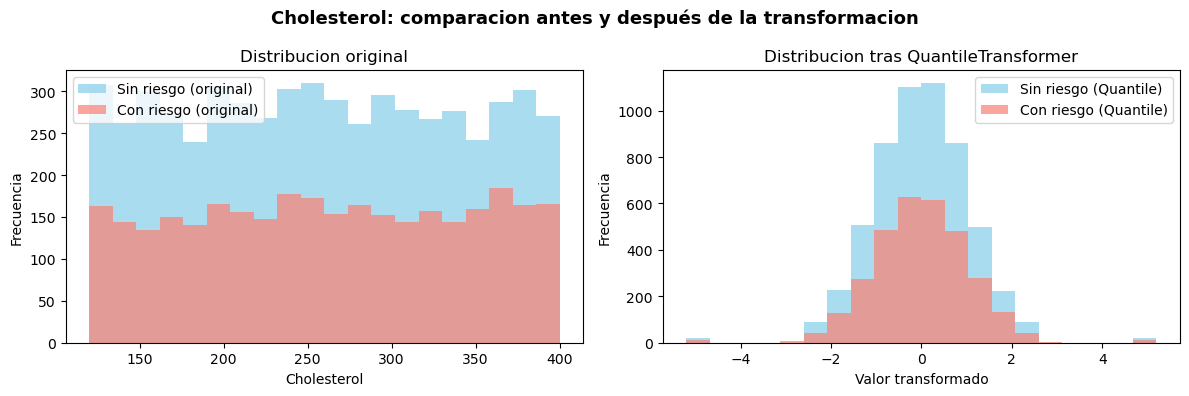

In [82]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Antes de la transformación
axs[0].hist(grupo_sin, bins=20, alpha=0.7, color='skyblue', label='Sin riesgo (original)')
axs[0].hist(grupo_con, bins=20, alpha=0.7, color='salmon', label='Con riesgo (original)')
axs[0].set_title('Distribucion original')
axs[0].set_xlabel(v)
axs[0].set_ylabel('Frecuencia')
axs[0].legend()

# Después de QuantileTransformer
axs[1].hist(x_qt, bins=20, alpha=0.7, color='skyblue', label='Sin riesgo (Quantile)')
axs[1].hist(y_qt, bins=20, alpha=0.7, color='salmon', label='Con riesgo (Quantile)')
axs[1].set_title('Distribucion tras QuantileTransformer')
axs[1].set_xlabel('Valor transformado')
axs[1].set_ylabel('Frecuencia')
axs[1].legend()

plt.suptitle(f"{v}: comparacion antes y después de la transformacion", fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

### Conclusión del análisis para la variable *Colesterol*

Despues de aplicar las pruebas de normalidad (Kolmogorov-Smirnov), se observo que los datos no seguian una distribucion  normal. Al usar la transformacion **QuantileTransformer**, la forma de la distribucion mejoro notablemente, haciendose mas simetrica y centrada, aunque las pruebas formales siguieron sin considerarla normal. 

Por esta razón, se aplico la prueba **no parametrica Mann–Whitney U**, adecuada cuando no se cumplen los supuestos de normalidad. El resultado obtenido fue un **p-valor de 0.0712**, con un nivel de significancia de **α = 0.05**. Dado que el valor p es mayor que el nivel de significancia, **no se rechaza la hipotesis nula (H₀)**. 

Esto indica que **no hay diferencias estadisticamente significativas en los niveles de colesterol** entre los grupos con y sin riesgo de infarto.


#### Analisis para la variable **Heart Rate (Frecuencia cardiaca)**

- **H0:** No existe diferencia significativa en la frecuencia cardiaca entre las personas con y sin riesgo de infarto.  
- **H1:** Existe una diferencia significativa en la frecuencia cardiaca entre las personas con y sin riesgo de infarto.

**Corroborar supuestos**

Normalidad

In [83]:
v = 'Heart Rate'
grupo_sin = df[df['Heart Attack Risk'] == 0][v].dropna()
grupo_con = df[df['Heart Attack Risk'] == 1][v].dropna()

print("\nPrimero evaluaremos si los datos de ambos grupos siguen una distribucion normal.\n"
      "Esto nos permitira decidir si usamos pruebas parametricas (como la t-test) o no parametricas (como Mann–Whitney U).")

p1 = test_normalityKS(grupo_sin, f"{v} (sin riesgo)")
p2 = test_normalityKS(grupo_con, f"{v} (con riesgo)")
n = p1 > 0.05 and p2 > 0.05



Primero evaluaremos si los datos de ambos grupos siguen una distribucion normal.
Esto nos permitira decidir si usamos pruebas parametricas (como la t-test) o no parametricas (como Mann–Whitney U).

 Análisis de normalidad por Kolmogorov-Smirnov para 'Heart Rate (sin riesgo)'
 Estadístico = 0.0701, p-valor = 0.0000

 Análisis de normalidad por Kolmogorov-Smirnov para 'Heart Rate (con riesgo)'
 Estadístico = 0.0734, p-valor = 0.0000


Los resultados del test de Kolmogorov–Smirnov (p < 0.05 en ambos grupos) muestran que los datos de *Heart Rate* **no siguen una distribución normal**. Probar transformación Box-Cox o transformación de quantiles

In [84]:
print("\nLos datos no parecen seguir una distribucion normal.\n Vamos a probar con la transformacion Box–Cox, que suele ayudar a que las variables se acerquen más a una forma normal.")
x_bc, _ = box_cox(grupo_sin)
y_bc, _ = box_cox(grupo_con)

    
p1b = test_normalityKS(x_bc, f"{v} (sin riesgo, Box–Cox)")
p2b = test_normalityKS(y_bc, f"{v} (con riesgo, Box–Cox)")
nn= p1b > 0.05 and p2b > 0.05

if nn:
    print("\nDespués de aplicar Box–Cox, los datos se comportan de manera mas normal. Revisamos homocedasticidad.")
    p_bartlett2 = test_homogeneityB(x_bc, y_bc, 'sin riesgo', 'con riesgo')
    if p_bartlett2 > 0.05:
        print("\nComo las varianzas son iguales, aplicamos la prueba t sobre los datos transformados.")
        p_val = t_test_two_sample(x_bc, y_bc)
    else:
        print("\nComo las varianzas son distintas, aplicamos la prueba no parametrica es decir Mann–Whitney U.")
        p_val = U_Mann_W(x_bc, y_bc)
else:
    print("\nComo Box–Cox no logro normalizar los datos. Aplicaremos QuantileTransformer.")
    x_qt = quantile_transform(grupo_sin)
    y_qt = quantile_transform(grupo_con)
    p1q = test_normalityKS(x_qt, f"{v} (sin riesgo, Quantile)")
    p2q = test_normalityKS(y_qt, f"{v} (con riesgo, Quantile)")
    print("\nRevisemos si despues de la transformacion los datos cumplen con normalidad y varianzas iguales.")

    if p1q > 0.05 and p2q > 0.05 and test_homogeneityB(x_qt, y_qt, 'sin riesgo', 'con riesgo') > 0.05:
        print("\nPerfecto: los supuestos se cumplen, aplicamos la prueba t.")
        p_val = t_test_two_sample(x_qt, y_qt)
    else:
        print("\nLos supuestos aun no se cumplen, asi que aplicamos la prueba no parametrica Mann–Whitney U.")
        p_val = U_Mann_W(grupo_sin, grupo_con)
    


Los datos no parecen seguir una distribucion normal.
 Vamos a probar con la transformacion Box–Cox, que suele ayudar a que las variables se acerquen más a una forma normal.
Lambda Box–Cox = 0.7584

Lambda Box–Cox = 0.7345


 Análisis de normalidad por Kolmogorov-Smirnov para 'Heart Rate (sin riesgo, Box–Cox)'
 Estadístico = 0.0721, p-valor = 0.0000

 Análisis de normalidad por Kolmogorov-Smirnov para 'Heart Rate (con riesgo, Box–Cox)'
 Estadístico = 0.0694, p-valor = 0.0000

Como Box–Cox no logro normalizar los datos. Aplicaremos QuantileTransformer.
Transformación QuantileTransformer aplicada )
Transformación QuantileTransformer aplicada )

 Análisis de normalidad por Kolmogorov-Smirnov para 'Heart Rate (sin riesgo, Quantile)'
 Estadístico = 0.0609, p-valor = 0.0000

 Análisis de normalidad por Kolmogorov-Smirnov para 'Heart Rate (con riesgo, Quantile)'
 Estadístico = 0.0619, p-valor = 0.0000

Revisemos si despues de la transformacion los datos cumplen con normalidad y varianzas igua

Los supuestos aun no se cumplen, asi que aplicamos la prueba no parametrica Mann–Whitney U.

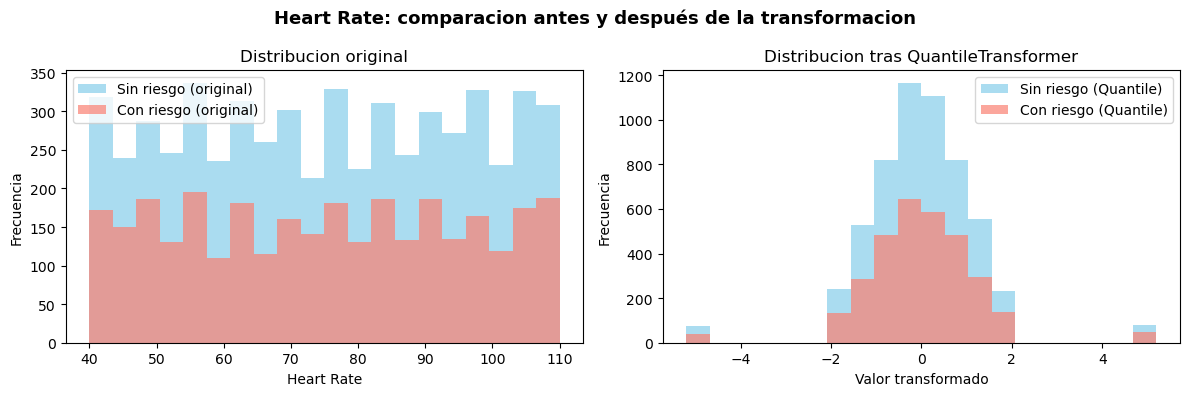

In [85]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Antes de la transformación
axs[0].hist(grupo_sin, bins=20, alpha=0.7, color='skyblue', label='Sin riesgo (original)')
axs[0].hist(grupo_con, bins=20, alpha=0.7, color='salmon', label='Con riesgo (original)')
axs[0].set_title('Distribucion original')
axs[0].set_xlabel(v)
axs[0].set_ylabel('Frecuencia')
axs[0].legend()

# Después de QuantileTransformer
axs[1].hist(x_qt, bins=20, alpha=0.7, color='skyblue', label='Sin riesgo (Quantile)')
axs[1].hist(y_qt, bins=20, alpha=0.7, color='salmon', label='Con riesgo (Quantile)')
axs[1].set_title('Distribucion tras QuantileTransformer')
axs[1].set_xlabel('Valor transformado')
axs[1].set_ylabel('Frecuencia')
axs[1].legend()

plt.suptitle(f"{v}: comparacion antes y después de la transformacion", fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

### Conclusion para *Heart Rate*

Despues de aplicar las transformaciones Box–Cox y QuantileTransformer, los datos de *Heart Rate* no lograron cumplir con los supuestos de normalidad. 
Por esta razón, se utilizo la prueba no parametrica **Mann–Whitney U**, cuyo resultado (p = 0.6802) indica que **no hay diferencias significativas** en la frecuencia cardiaca entre los grupos **con riesgo** y **sin riesgo**.


#### Analisis para la variable **Exercise Hours Per Week (Horas de ejercicio por semana)**

- **H0:** No existe diferencia significativa en las horas de ejercicio semanal entre las personas con y sin riesgo de infarto.  
- **H1:** Existe una diferencia significativa en las horas de ejercicio semanal entre las personas con y sin riesgo de infarto.

**Corroborar supuestos**

Normalidad

In [86]:
v = 'Exercise Hours Per Week'
grupo_sin = df[df['Heart Attack Risk'] == 0][v].dropna()
grupo_con = df[df['Heart Attack Risk'] == 1][v].dropna()

print("\nPrimero evaluaremos si los datos de ambos grupos siguen una distribucion normal.\n"
      "Esto nos permitira decidir si usamos pruebas parametricas (como la t-test) o no parametricas (como Mann–Whitney U).")

p1 = test_normalityKS(grupo_sin, f"{v} (sin riesgo)")
p2 = test_normalityKS(grupo_con, f"{v} (con riesgo)")
n = p1 > 0.05 and p2 > 0.05



Primero evaluaremos si los datos de ambos grupos siguen una distribucion normal.
Esto nos permitira decidir si usamos pruebas parametricas (como la t-test) o no parametricas (como Mann–Whitney U).

 Análisis de normalidad por Kolmogorov-Smirnov para 'Exercise Hours Per Week (sin riesgo)'
 Estadístico = 0.0604, p-valor = 0.0000

 Análisis de normalidad por Kolmogorov-Smirnov para 'Exercise Hours Per Week (con riesgo)'
 Estadístico = 0.0631, p-valor = 0.0000


Los datos no siguen una distribución normal. Intentar transformar con box-cox o transformación de quantiles

Los supuestos se cumplen, aplicamos la prueba t para 2 muestras.

In [87]:
print("\nLos datos no parecen seguir una distribucion normal.\n Vamos a probar con la transformacion Box–Cox, que suele ayudar a que las variables se acerquen más a una forma normal.")
x_bc, _ = box_cox(grupo_sin)
y_bc, _ = box_cox(grupo_con)

    
p1b = test_normalityKS(x_bc, f"{v} (sin riesgo, Box–Cox)")
p2b = test_normalityKS(y_bc, f"{v} (con riesgo, Box–Cox)")
nn= p1b > 0.05 and p2b > 0.05

if nn:
    print("\nDespués de aplicar Box–Cox, los datos se comportan de manera mas normal. Revisamos homocedasticidad.")
    p_bartlett2 = test_homogeneityB(x_bc, y_bc, 'sin riesgo', 'con riesgo')
    if p_bartlett2 > 0.05:
        print("\nComo las varianzas son iguales, aplicamos la prueba t sobre los datos transformados.")
        p_val = t_test_two_sample(x_bc, y_bc)
    else:
        print("\nComo las varianzas son distintas, aplicamos la prueba no parametrica es decir Mann–Whitney U.")
        p_val = U_Mann_W(x_bc, y_bc)
else:
    print("\nComo Box–Cox no logro normalizar los datos. Aplicaremos QuantileTransformer.")
    x_qt = quantile_transform(grupo_sin)
    y_qt = quantile_transform(grupo_con)
    p1q = test_normalityKS(x_qt, f"{v} (sin riesgo, Quantile)")
    p2q = test_normalityKS(y_qt, f"{v} (con riesgo, Quantile)")
    print("\nRevisemos si despues de la transformacion los datos cumplen con normalidad y varianzas iguales.")

    if p1q > 0.05 and p2q > 0.05 and test_homogeneityB(x_qt, y_qt, 'sin riesgo', 'con riesgo') > 0.05:
        print("\nPerfecto: los supuestos se cumplen, aplicamos la prueba t.")
        p_val = t_test_two_sample(x_qt, y_qt)
    else:
        print("\nLos supuestos aun no se cumplen, asi que aplicamos la prueba no parametrica Mann–Whitney U.")
        p_val = U_Mann_W(grupo_sin, grupo_con)
    


Los datos no parecen seguir una distribucion normal.
 Vamos a probar con la transformacion Box–Cox, que suele ayudar a que las variables se acerquen más a una forma normal.
Lambda Box–Cox = 0.7051

Lambda Box–Cox = 0.7231


 Análisis de normalidad por Kolmogorov-Smirnov para 'Exercise Hours Per Week (sin riesgo, Box–Cox)'
 Estadístico = 0.0651, p-valor = 0.0000

 Análisis de normalidad por Kolmogorov-Smirnov para 'Exercise Hours Per Week (con riesgo, Box–Cox)'
 Estadístico = 0.0730, p-valor = 0.0000

Como Box–Cox no logro normalizar los datos. Aplicaremos QuantileTransformer.
Transformación QuantileTransformer aplicada )
Transformación QuantileTransformer aplicada )

 Análisis de normalidad por Kolmogorov-Smirnov para 'Exercise Hours Per Week (sin riesgo, Quantile)'
 Estadístico = 0.0013, p-valor = 1.0000

 Análisis de normalidad por Kolmogorov-Smirnov para 'Exercise Hours Per Week (con riesgo, Quantile)'
 Estadístico = 0.0022, p-valor = 1.0000

Revisemos si despues de la transformaci

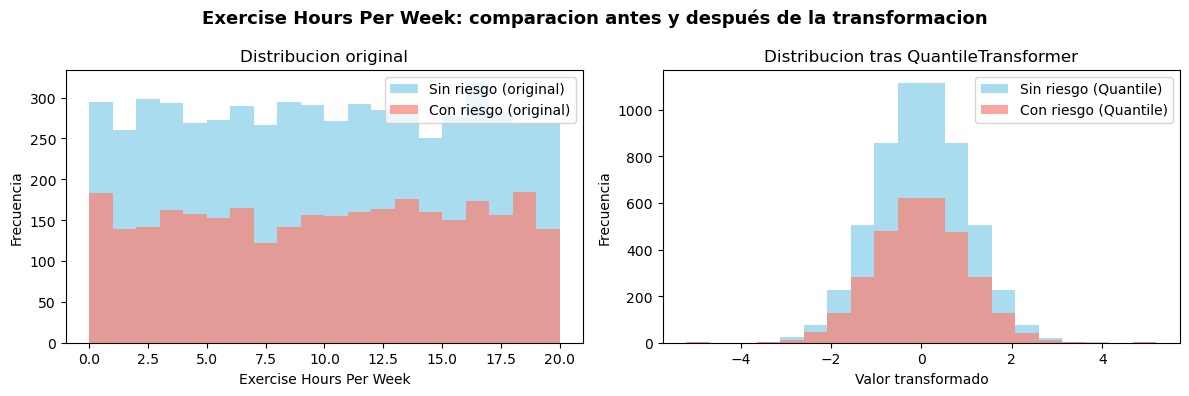

In [88]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Antes de la transformación
axs[0].hist(grupo_sin, bins=20, alpha=0.7, color='skyblue', label='Sin riesgo (original)')
axs[0].hist(grupo_con, bins=20, alpha=0.7, color='salmon', label='Con riesgo (original)')
axs[0].set_title('Distribucion original')
axs[0].set_xlabel(v)
axs[0].set_ylabel('Frecuencia')
axs[0].legend()

# Después de QuantileTransformer
axs[1].hist(x_qt, bins=20, alpha=0.7, color='skyblue', label='Sin riesgo (Quantile)')
axs[1].hist(y_qt, bins=20, alpha=0.7, color='salmon', label='Con riesgo (Quantile)')
axs[1].set_title('Distribucion tras QuantileTransformer')
axs[1].set_xlabel('Valor transformado')
axs[1].set_ylabel('Frecuencia')
axs[1].legend()

plt.suptitle(f"{v}: comparacion antes y después de la transformacion", fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

### Conclusion *Exercise Hours Per Week*

En la grafica se observa que, antes de la transformación, la distribucion de *Exercise Hours Per Week* era bastante dispersa y alejada de la forma normal.
Tras aplicar el **QuantileTransformer**, ambas distribuciones se concentraron alrededor de la media, adquiriendo asi una forma **simetrica y similar a la normal**, lo que coincide con los resultados del test de Kolmogorov–Smirnov (p = 1.0000).  

Ademas, la prueba de **Bartlett** (p = 0.8405) confirmo que las varianzas entre los grupos eran homogeneas, por lo que se aplico la **prueba t para dos muestras independientes**.  
El resultado de la prueba (p = 0.9960) llevo a **no rechazar H₀**, concluyendo que **no hay diferencias significativas** en las horas de ejercicio semanal entre los grupos.  
Esto sugiere que, en la muestra analizada, la cantidad de ejercicio no presenta una asociacion clara con el riesgo cardiovascular.

#### Analisis para la variable **BMI (Índice de masa corporal)**

- **H0:** No existe diferencia significativa en el indice de masa corporal entre las personas con y sin riesgo de infarto.  
- **H1:** Existe una diferencia significativa en el indice de masa corporal entre las personas con y sin riesgo de infarto.

**Corroborar supuestos**

Normalidad

In [89]:
v = 'BMI'
grupo_sin = df[df['Heart Attack Risk'] == 0][v].dropna()
grupo_con = df[df['Heart Attack Risk'] == 1][v].dropna()

print("\nPrimero evaluaremos si los datos de ambos grupos siguen una distribucion normal.\n"
      "Esto nos permitira decidir si usamos pruebas parametricas (como la t-test) o no parametricas (como Mann–Whitney U).")

p1 = test_normalityKS(grupo_sin, f"{v} (sin riesgo)")
p2 = test_normalityKS(grupo_con, f"{v} (con riesgo)")
n = p1 > 0.05 and p2 > 0.05



Primero evaluaremos si los datos de ambos grupos siguen una distribucion normal.
Esto nos permitira decidir si usamos pruebas parametricas (como la t-test) o no parametricas (como Mann–Whitney U).

 Análisis de normalidad por Kolmogorov-Smirnov para 'BMI (sin riesgo)'
 Estadístico = 0.0605, p-valor = 0.0000

 Análisis de normalidad por Kolmogorov-Smirnov para 'BMI (con riesgo)'
 Estadístico = 0.0664, p-valor = 0.0000


Los datos no parecen seguir una distribucion normal. Transformar con Box-Cox o transformación de quantiles

Los supuestos se cumplen, aplicamos la prueba t para 2 muestras.

In [90]:
print("\nLos datos no parecen seguir una distribucion normal.\n Vamos a probar con la transformacion Box–Cox, que suele ayudar a que las variables se acerquen más a una forma normal.")
x_bc, _ = box_cox(grupo_sin)
y_bc, _ = box_cox(grupo_con)

    
p1b = test_normalityKS(x_bc, f"{v} (sin riesgo, Box–Cox)")
p2b = test_normalityKS(y_bc, f"{v} (con riesgo, Box–Cox)")
nn= p1b > 0.05 and p2b > 0.05

if nn:
    print("\nDespués de aplicar Box–Cox, los datos se comportan de manera mas normal. Revisamos homocedasticidad.")
    p_bartlett2 = test_homogeneityB(x_bc, y_bc, 'sin riesgo', 'con riesgo')
    if p_bartlett2 > 0.05:
        print("\nComo las varianzas son iguales, aplicamos la prueba t sobre los datos transformados.")
        p_val = t_test_two_sample(x_bc, y_bc)
    else:
        print("\nComo las varianzas son distintas, aplicamos la prueba no parametrica es decir Mann–Whitney U.")
        p_val = U_Mann_W(x_bc, y_bc)
else:
    print("\nComo Box–Cox no logro normalizar los datos. Aplicaremos QuantileTransformer.")
    x_qt = quantile_transform(grupo_sin)
    y_qt = quantile_transform(grupo_con)
    p1q = test_normalityKS(x_qt, f"{v} (sin riesgo, Quantile)")
    p2q = test_normalityKS(y_qt, f"{v} (con riesgo, Quantile)")
    print("\nRevisemos si despues de la transformacion los datos cumplen con normalidad y varianzas iguales.")

    if p1q > 0.05 and p2q > 0.05 and test_homogeneityB(x_qt, y_qt, 'sin riesgo', 'con riesgo') > 0.05:
        print("\nPerfecto: los supuestos se cumplen, aplicamos la prueba t.")
        p_val = t_test_two_sample(x_qt, y_qt)
    else:
        print("\nLos supuestos aun no se cumplen, asi que aplicamos la prueba no parametrica Mann–Whitney U.")
        p_val = U_Mann_W(grupo_sin, grupo_con)
    


Los datos no parecen seguir una distribucion normal.
 Vamos a probar con la transformacion Box–Cox, que suele ayudar a que las variables se acerquen más a una forma normal.
Lambda Box–Cox = 0.6841

Lambda Box–Cox = 0.6010


 Análisis de normalidad por Kolmogorov-Smirnov para 'BMI (sin riesgo, Box–Cox)'
 Estadístico = 0.0583, p-valor = 0.0000

 Análisis de normalidad por Kolmogorov-Smirnov para 'BMI (con riesgo, Box–Cox)'
 Estadístico = 0.0706, p-valor = 0.0000

Como Box–Cox no logro normalizar los datos. Aplicaremos QuantileTransformer.
Transformación QuantileTransformer aplicada )
Transformación QuantileTransformer aplicada )

 Análisis de normalidad por Kolmogorov-Smirnov para 'BMI (sin riesgo, Quantile)'
 Estadístico = 0.0014, p-valor = 1.0000

 Análisis de normalidad por Kolmogorov-Smirnov para 'BMI (con riesgo, Quantile)'
 Estadístico = 0.0021, p-valor = 1.0000

Revisemos si despues de la transformacion los datos cumplen con normalidad y varianzas iguales.

 Análisis de homocedas

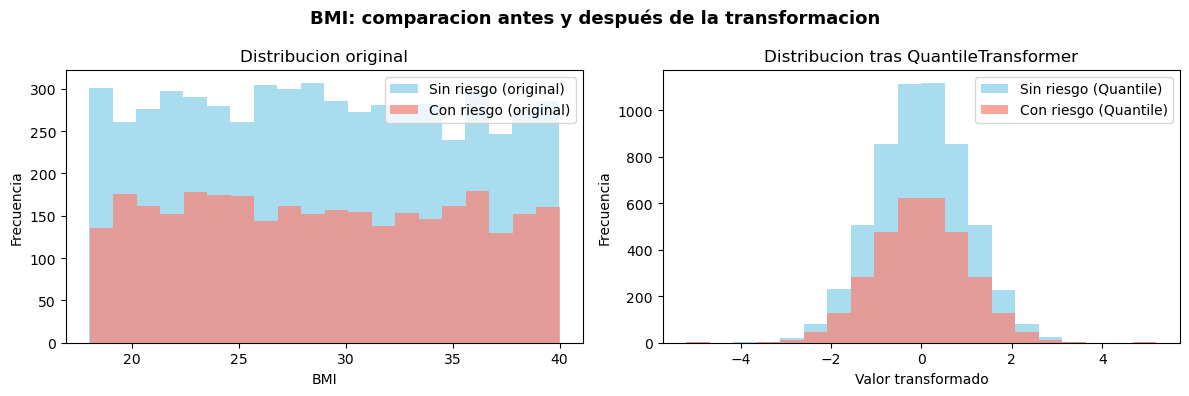

In [91]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Antes de la transformación
axs[0].hist(grupo_sin, bins=20, alpha=0.7, color='skyblue', label='Sin riesgo (original)')
axs[0].hist(grupo_con, bins=20, alpha=0.7, color='salmon', label='Con riesgo (original)')
axs[0].set_title('Distribucion original')
axs[0].set_xlabel(v)
axs[0].set_ylabel('Frecuencia')
axs[0].legend()

# Después de QuantileTransformer
axs[1].hist(x_qt, bins=20, alpha=0.7, color='skyblue', label='Sin riesgo (Quantile)')
axs[1].hist(y_qt, bins=20, alpha=0.7, color='salmon', label='Con riesgo (Quantile)')
axs[1].set_title('Distribucion tras QuantileTransformer')
axs[1].set_xlabel('Valor transformado')
axs[1].set_ylabel('Frecuencia')
axs[1].legend()

plt.suptitle(f"{v}: comparacion antes y después de la transformacion", fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

### Conclusion de *BMI*

Tras aplicar la transformacion **Box–Cox**, los datos no lograron ajustarse a la normalidad, por lo que se empleo el **QuantileTransformer**, con el cual las distribuciones adquirieron una forma mas simetrica y cercana a la normal.  
Posteriormente, se aplico la **prueba t para dos muestras independientes**, obteniendo un p-valor de **0.9971**, superior al nivel de significancia (0.05).  

Por tanto, **no se rechaza H₀**, lo que indica que **no existen diferencias significativas en el indice de masa corporal (BMI)** entre los grupos **con riesgo** y **sin riesgo**.  
En la grafica se aprecia que ambos grupos presentan valores similares de BMI, lo que sugiere que **el indice de masa corporal no influye de manera evidente en el nivel de riesgo** dentro de la muestra analizada.

#### Analisis para la variable **Sleep Hours Per Day (Horas de sueño por dia)**

- **H0:** No existe diferencia significativa en las horas de sueño diarias entre las personas con y sin riesgo de infarto.  
- **H1:** Existe una diferencia significativa en las horas de sueño diarias entre las personas con y sin riesgo de infarto.

**Corroborar supuestos**

Normalidad

In [92]:
v = 'Sleep Hours Per Day'
grupo_sin = df[df['Heart Attack Risk'] == 0][v].dropna()
grupo_con = df[df['Heart Attack Risk'] == 1][v].dropna()

print("\nPrimero evaluaremos si los datos de ambos grupos siguen una distribucion normal.\n"
      "Esto nos permitira decidir si usamos pruebas parametricas (como la t-test) o no parametricas (como Mann–Whitney U).")

p1 = test_normalityKS(grupo_sin, f"{v} (sin riesgo)")
p2 = test_normalityKS(grupo_con, f"{v} (con riesgo)")
n = p1 > 0.05 and p2 > 0.05



Primero evaluaremos si los datos de ambos grupos siguen una distribucion normal.
Esto nos permitira decidir si usamos pruebas parametricas (como la t-test) o no parametricas (como Mann–Whitney U).

 Análisis de normalidad por Kolmogorov-Smirnov para 'Sleep Hours Per Day (sin riesgo)'
 Estadístico = 0.1271, p-valor = 0.0000

 Análisis de normalidad por Kolmogorov-Smirnov para 'Sleep Hours Per Day (con riesgo)'
 Estadístico = 0.1257, p-valor = 0.0000


Los datos no siguen una distribución normal. Intentar transformar con box-cox o transformación de quantiles

Los supuestos no se cumplen, aplicamos la prueba U-de-Mann Withney.

In [93]:
print("\nLos datos no parecen seguir una distribucion normal.\n Vamos a probar con la transformacion Box–Cox, que suele ayudar a que las variables se acerquen más a una forma normal.")
x_bc, _ = box_cox(grupo_sin)
y_bc, _ = box_cox(grupo_con)

    
p1b = test_normalityKS(x_bc, f"{v} (sin riesgo, Box–Cox)")
p2b = test_normalityKS(y_bc, f"{v} (con riesgo, Box–Cox)")
nn= p1b > 0.05 and p2b > 0.05

if nn:
    print("\nDespués de aplicar Box–Cox, los datos se comportan de manera mas normal. Revisamos homocedasticidad.")
    p_bartlett2 = test_homogeneityB(x_bc, y_bc, 'sin riesgo', 'con riesgo')
    if p_bartlett2 > 0.05:
        print("\nComo las varianzas son iguales, aplicamos la prueba t sobre los datos transformados.")
        p_val = t_test_two_sample(x_bc, y_bc)
    else:
        print("\nComo las varianzas son distintas, aplicamos la prueba no parametrica es decir Mann–Whitney U.")
        p_val = U_Mann_W(x_bc, y_bc)
else:
    print("\nComo Box–Cox no logro normalizar los datos. Aplicaremos QuantileTransformer.")
    x_qt = quantile_transform(grupo_sin)
    y_qt = quantile_transform(grupo_con)
    p1q = test_normalityKS(x_qt, f"{v} (sin riesgo, Quantile)")
    p2q = test_normalityKS(y_qt, f"{v} (con riesgo, Quantile)")
    print("\nRevisemos si despues de la transformacion los datos cumplen con normalidad y varianzas iguales.")

    if p1q > 0.05 and p2q > 0.05 and test_homogeneityB(x_qt, y_qt, 'sin riesgo', 'con riesgo') > 0.05:
        print("\nPerfecto: los supuestos se cumplen, aplicamos la prueba t.")
        p_val = t_test_two_sample(x_qt, y_qt)
    else:
        print("\nLos supuestos aun no se cumplen, asi que aplicamos la prueba no parametrica Mann–Whitney U.")
        p_val = U_Mann_W(grupo_sin, grupo_con)
    


Los datos no parecen seguir una distribucion normal.
 Vamos a probar con la transformacion Box–Cox, que suele ayudar a que las variables se acerquen más a una forma normal.
Lambda Box–Cox = 0.7601

Lambda Box–Cox = 0.6890


 Análisis de normalidad por Kolmogorov-Smirnov para 'Sleep Hours Per Day (sin riesgo, Box–Cox)'
 Estadístico = 0.1266, p-valor = 0.0000

 Análisis de normalidad por Kolmogorov-Smirnov para 'Sleep Hours Per Day (con riesgo, Box–Cox)'
 Estadístico = 0.1308, p-valor = 0.0000

Como Box–Cox no logro normalizar los datos. Aplicaremos QuantileTransformer.
Transformación QuantileTransformer aplicada )
Transformación QuantileTransformer aplicada )

 Análisis de normalidad por Kolmogorov-Smirnov para 'Sleep Hours Per Day (sin riesgo, Quantile)'
 Estadístico = 0.2513, p-valor = 0.0000

 Análisis de normalidad por Kolmogorov-Smirnov para 'Sleep Hours Per Day (con riesgo, Quantile)'
 Estadístico = 0.2484, p-valor = 0.0000

Revisemos si despues de la transformacion los datos cum

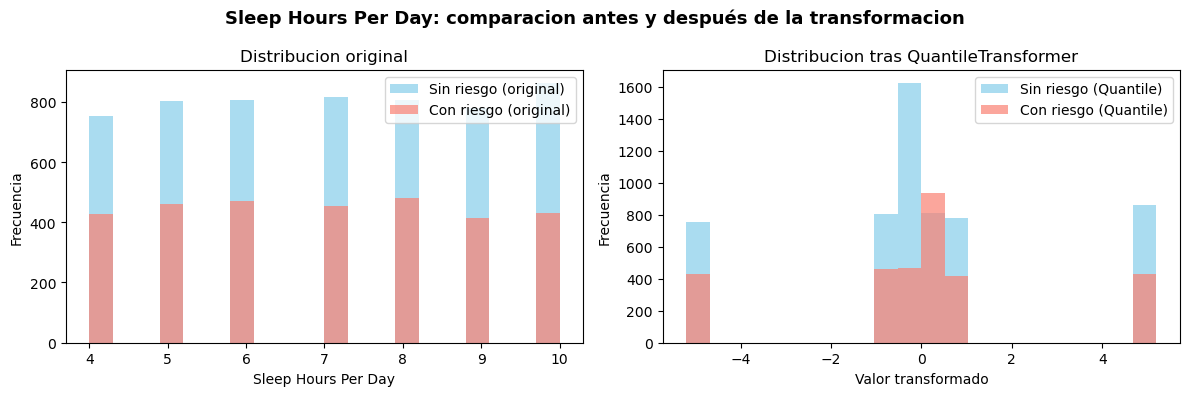

In [94]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Antes de la transformación
axs[0].hist(grupo_sin, bins=20, alpha=0.7, color='skyblue', label='Sin riesgo (original)')
axs[0].hist(grupo_con, bins=20, alpha=0.7, color='salmon', label='Con riesgo (original)')
axs[0].set_title('Distribucion original')
axs[0].set_xlabel(v)
axs[0].set_ylabel('Frecuencia')
axs[0].legend()

# Después de QuantileTransformer
axs[1].hist(x_qt, bins=20, alpha=0.7, color='skyblue', label='Sin riesgo (Quantile)')
axs[1].hist(y_qt, bins=20, alpha=0.7, color='salmon', label='Con riesgo (Quantile)')
axs[1].set_title('Distribucion tras QuantileTransformer')
axs[1].set_xlabel('Valor transformado')
axs[1].set_ylabel('Frecuencia')
axs[1].legend()

plt.suptitle(f"{v}: comparacion antes y después de la transformacion", fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

### Conclusion de *Sleep Hours Per Day*

Las transformaciones Box–Cox y QuantileTransformer no lograron normalizar los datos, ya que los p-valores del test de Kolmogorov–Smirnov fueron menores a 0.05.
Por ello, se utilizo la prueba no parametrica de U de Mann Whitney,  obteniendo p = 0.0838, por lo que no se rechaza H₀.

Esto sugiere que **no existen diferencias significativas en las horas de sueño entre los grupos con y sin riesgo.**
En la gráfica se observa que ambos grupos presentan distribuciones muy similares, sin haber una tendencia clara hacia valores mayores o menores.
Aunque la variable **no es continua*, la prueba Mann–Whitney U es adecuada para comparar medianas entre dos grupos independientes.

In [95]:
data = {
    'Variable': ['Colesterol', 'Sleep Hours Per Day', 'Heart Rate',
                 'Exercise Hours Per Week', 'BMI'],
    'Método aplicado': ['Mann–Whitney U', 'Mann–Whitney U', 'Mann–Whitney U',
                        't-test (dos muestras)', 't-test (dos muestras)'],
    'Valor p': [0.0712, 0.0838, 0.6802, 0.9960, 0.9971],
    'Conclusión': [
        'No hay diferencias significativas entre grupos.',
        'No hay diferencias significativas en las horas de sueño.',
        'No hay diferencias significativas en la frecuencia cardíaca.',
        'No hay diferencias significativas en horas de ejercicio.',
        'No existen diferencias en el índice de masa corporal.'
    ]
}

tabla = pd.DataFrame(data)
e= (
    tabla.style
    .set_table_styles([
        {'selector': 'th.col0', 'props': [('background-color', 'skyblue'), ('color', 'black')]},
        {'selector': 'th.col1', 'props': [('background-color', 'salmon'), ('color', 'black')]},
        {'selector': 'th.col2', 'props': [('background-color', 'skyblue'), ('color', 'black')]},
        {'selector': 'th.col3', 'props': [('background-color', 'salmon'), ('color', 'black')]},
        {'selector': 'th', 'props': [('text-align', 'center'), ('font-weight', 'bold'), ('border', '1px solid #ccc')]},
        {'selector': 'td', 'props': [('text-align', 'center'), ('border', '1px solid #ccc'), ('font-size', '13px')]}
    ])
    .hide(axis="index")
)

e




Variable,Método aplicado,Valor p,Conclusión
Colesterol,Mann–Whitney U,0.071200,No hay diferencias significativas entre grupos.
Sleep Hours Per Day,Mann–Whitney U,0.083800,No hay diferencias significativas en las horas de sueño.
Heart Rate,Mann–Whitney U,0.680200,No hay diferencias significativas en la frecuencia cardíaca.
Exercise Hours Per Week,t-test (dos muestras),0.996000,No hay diferencias significativas en horas de ejercicio.
BMI,t-test (dos muestras),0.997100,No existen diferencias en el índice de masa corporal.


### Conclusion del análisis estadistico para pacientes con y sin riesgo de sufrir un infarto

De acuerdo con los resultados obtenidos, los valores *p* de todas las variables analizadas fueron mayores a 0.05.  
Esto significa que **no se encontraron diferencias estadisticamente significativas** entre los grupos comparados.

En otras palabras, las variables **colesterol, horas de sueño, frecuencia cardíaca, horas de ejercicio por semana y el indice de masa corporal (BMI)** se comportaron de forma similar en ambos grupos.  

Aunque puedan existir pequeñas variaciones en los promedios, estas diferencias **no son lo suficientemente grandes como para considerarse significativas desde el punto de vista estadístico**.  

Por lo tanto, dentro de esta muestra, **ninguna de las variables estudiadas muestra una relacion clara con el riesgo cardiovascular**, lo que sugiere que los factores analizados no influyen de manera relevante en la diferencia entre los grupos.